<a href="https://colab.research.google.com/github/niteesh19mt0250/Zamato-Resturant-Clustering-and-Sentiment-Analysis/blob/main/Zamato_Resturant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**: Zamato Resturant Clustering and Sentiment Analysis


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/niteesh19mt0250/Zamato-Resturant-Clustering-and-Sentiment-Analysis/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msn
!pip install ipython_Autotime
%load_ext autotime
import datetime as dt



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.5 MB/s eta 0:00:00
time: 515 µs (started: 2023-07-15 15:31:00 +00:00)


### Dataset Loading

In [ ]:
# Import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 51.5 s (started: 2023-07-15 15:31:00 +00:00)


In [ ]:
# Load Dataset
df_restaurant = pd.read_csv('/content/drive/MyDrive/Project /Unsupervised Learning/Zomato Restaurant names and Metadata.csv')
df_review = pd.read_csv('/content/drive/MyDrive/Project /Unsupervised Learning/Zomato Restaurant reviews.csv')

time: 908 ms (started: 2023-07-15 15:31:51 +00:00)


### Dataset First View

In [ ]:
# Dataset First Look top 5 of zamato resturant name
df_restaurant.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

time: 27.8 ms (started: 2023-07-15 15:31:52 +00:00)


In [ ]:
# Dataset First Look bottom 5 of zamato resturant name
df_restaurant.tail()

Name  \
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

              Collections                         Cuisines  \
100                   NaN                 Fast Food, Salad   
101                   NaN                   Bakery, Mithai   
102                   NaN   North Indian, Biryani, Chinese   
103                   NaN                        Fast Food   
104  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian   

                                               Timings  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight

time: 9.96 ms (started: 2023-07-15 15:31:52 +00:00)


In [ ]:
# Dataset First Look top 5 of zamato resturant review
df_review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

time: 14 ms (started: 2023-07-15 15:31:52 +00:00)


In [ ]:
# Dataset First Look bottom 5 of zamato resturant review
df_review.tail()

Restaurant          Reviewer  \
9995  Chinese Pavilion  Abhishek Mahajan   
9996  Chinese Pavilion    Sharad Agrawal   
9997  Chinese Pavilion         Ramandeep   
9998  Chinese Pavilion   Nayana Shanbhag   
9999  Chinese Pavilion  Bhargava Krishna   

                                                 Review Rating  \
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6

time: 10 ms (started: 2023-07-15 15:31:52 +00:00)


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count of zamato resturant name
print(f'Number of rows in the dataset: {df_restaurant.shape[0]} \n Number of columns in the dataset: {df_restaurant.shape[1]}')

Number of rows in the dataset: 105 
 Number of columns in the dataset: 6
time: 464 µs (started: 2023-07-15 15:31:52 +00:00)


In [ ]:
# Dataset Rows & Columns count of zamato resturant review
print(f'Number of rows in the dataset: {df_review.shape[0]} \n Number of columns in the dataset: {df_review.shape[1]}')

Number of rows in the dataset: 10000 
 Number of columns in the dataset: 7
time: 4.38 ms (started: 2023-07-15 15:31:52 +00:00)


### Dataset Information

In [ ]:
# Dataset Info of zamato restaurant name
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
time: 19.8 ms (started: 2023-07-15 15:31:52 +00:00)


In [ ]:
# Dataset Info of zamato restaurant review
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
time: 21.5 ms (started: 2023-07-15 15:31:52 +00:00)


### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count in Zamato restaurant name dataset
print('Total number of duplicted value present in the zamato resturent name dataset:',df_restaurant.duplicated().sum())

Total number of duplicted value present in the zamato resturent name dataset: 0
time: 8.46 ms (started: 2023-07-15 15:31:52 +00:00)


In [ ]:
# Dataset Duplicate Value Count in Zamato restaurant review dataset
print('Total number of duplicted value present in the zamato resturent review dataset:',df_review.duplicated().sum())

Total number of duplicted value present in the zamato resturent review dataset: 36
time: 23.9 ms (started: 2023-07-15 15:31:52 +00:00)


### Missing Values/Null Values

In [ ]:
# Defining the missing function which the missing value description and bar plot of the missing value
def missing_func(df):
  missing_value = df.isnull().sum()
  percentage_of_missing_value = df.isnull().sum()*100/(df.shape[0])
  missing_table = pd.concat([missing_value,percentage_of_missing_value],axis = 1)
  missing_table = missing_table.rename(columns={df.index.name:'col_name',0:'missing_value',1:'% of missing values'})
  missing_table['Data_Type'] = df.dtypes
  msn.bar(df,color = 'skyblue')
  return missing_table

time: 876 µs (started: 2023-07-15 15:31:53 +00:00)


missing_value  % of missing values Data_Type
Name                     0             0.000000    object
Links                    0             0.000000    object
Cost                     0             0.000000    object
Collections             54            51.428571    object
Cuisines                 0             0.000000    object
Timings                  1             0.952381    object

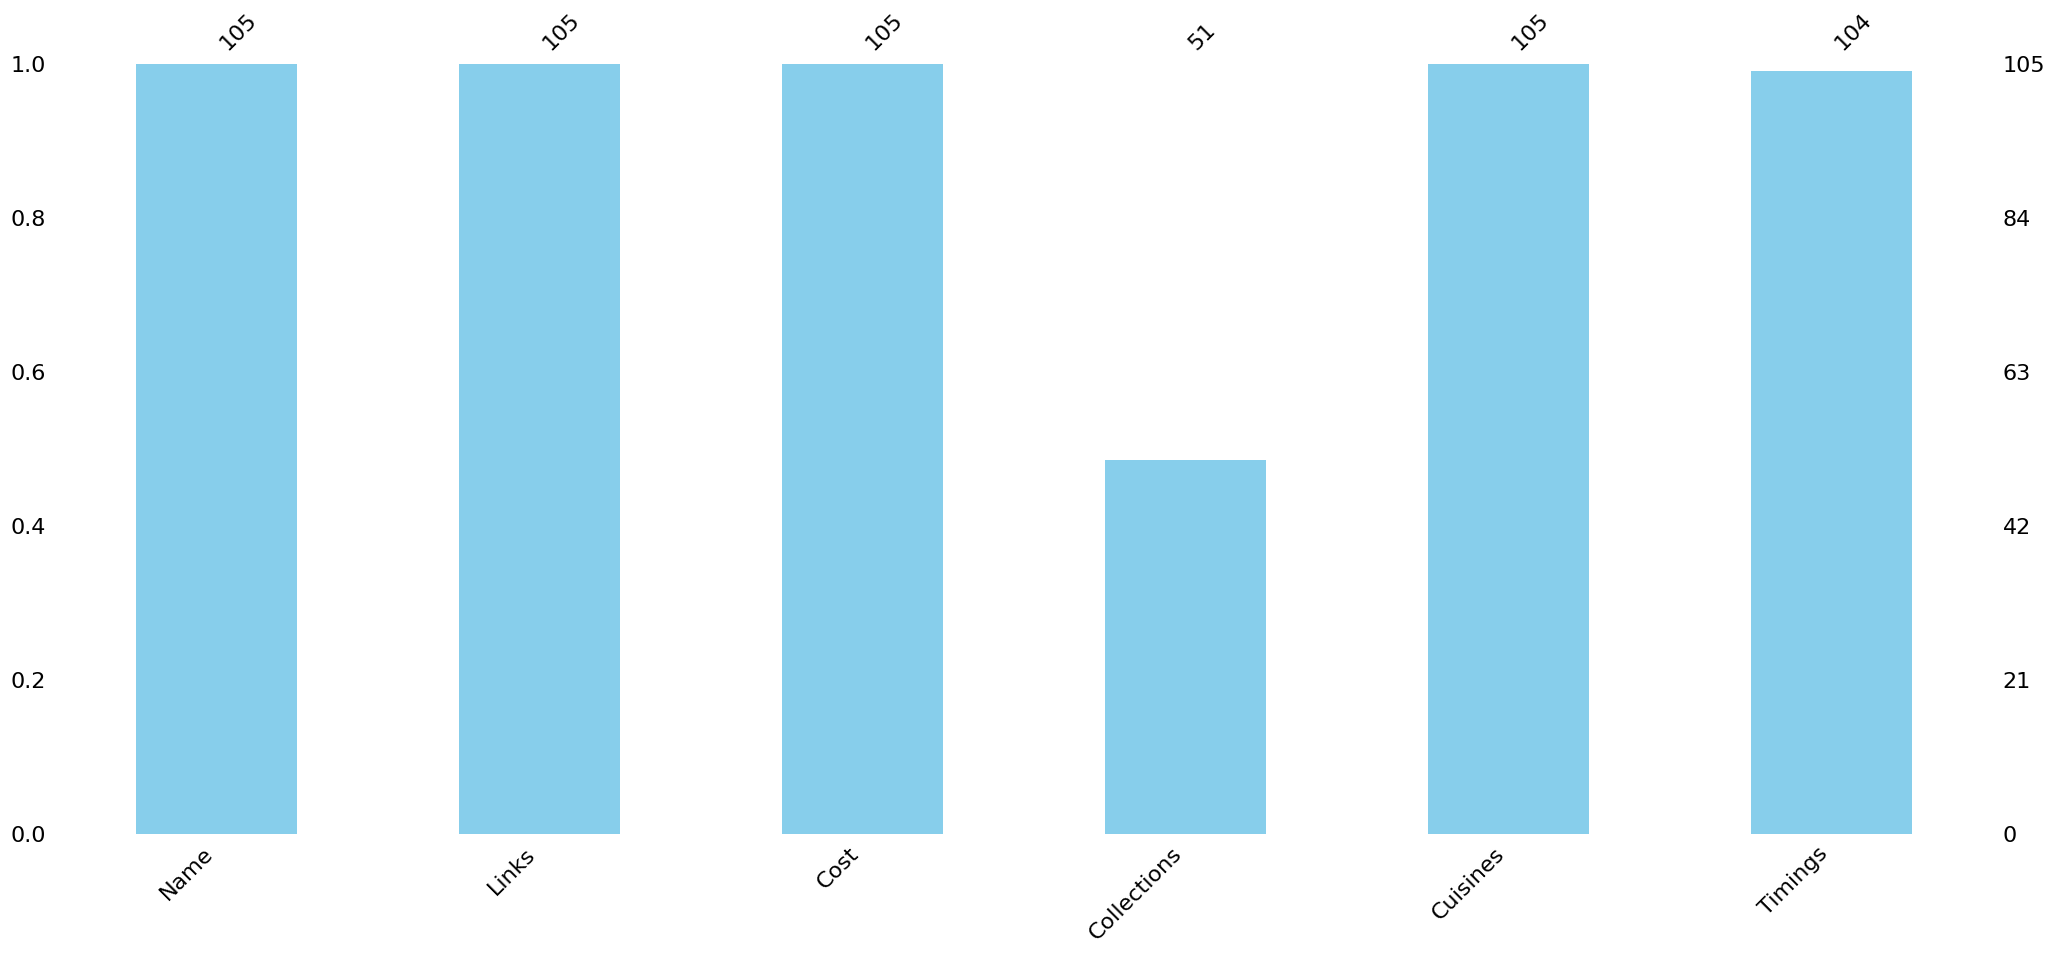

time: 1.22 s (started: 2023-07-15 15:31:53 +00:00)


In [ ]:
# Missing Values/Null Values Count of zamato restaurent name dataset
missing_func(df_restaurant)

missing_value  % of missing values Data_Type
Restaurant              0                 0.00    object
Reviewer               38                 0.38    object
Review                 45                 0.45    object
Rating                 38                 0.38    object
Metadata               38                 0.38    object
Time                   38                 0.38    object
Pictures                0                 0.00     int64

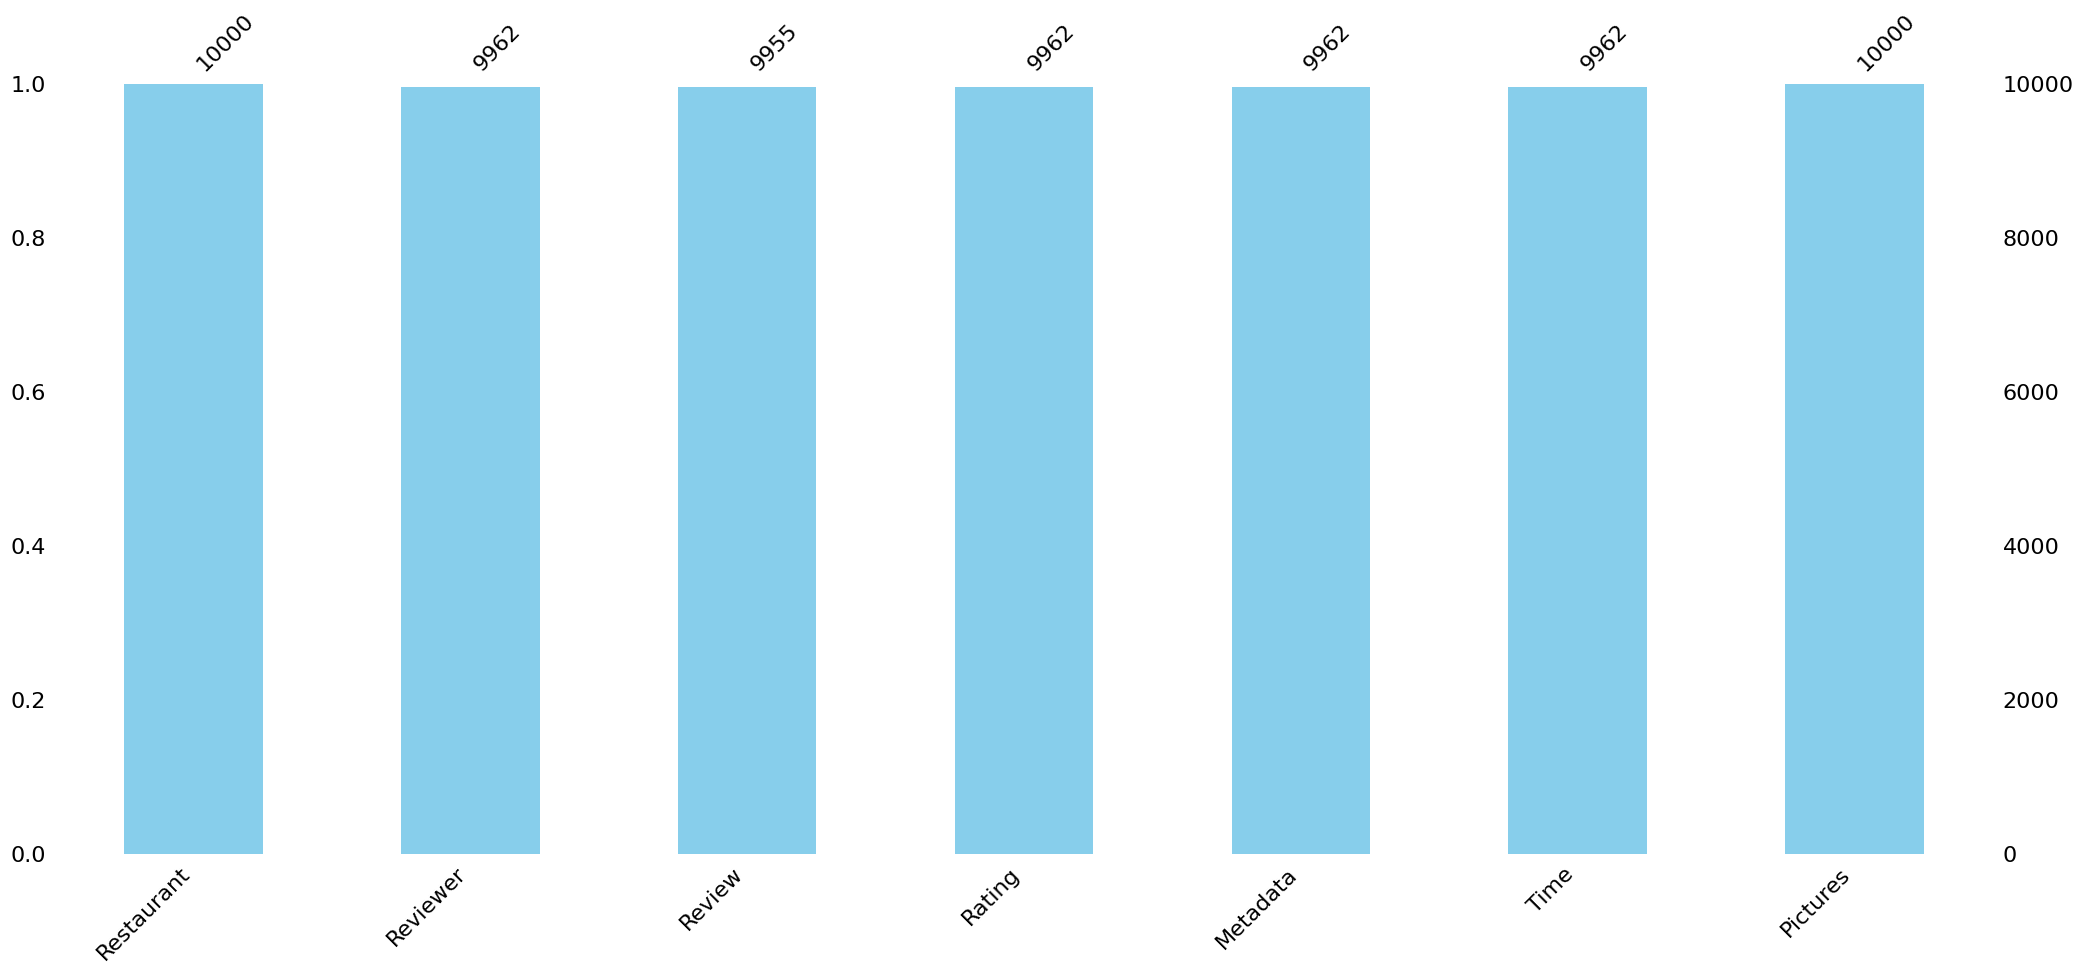

In [ ]:
# Missing Values/Null Values Count of zamato resturent review dataset
missing_func(df_review)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns of Zamato restaurant name
print(df_restaurant.columns)
print('\n')

time: 1.15 s (started: 2023-07-15 15:31:54 +00:00)
Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


time: 921 µs (started: 2023-07-15 15:31:55 +00:00)


In [ ]:
# Dataset Columns of Zamato restaurant review
print(df_review.columns)
print('\n')

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


time: 1.68 ms (started: 2023-07-15 15:31:55 +00:00)


In [ ]:
# Dataset Describe of zamato restaurant name
df_restaurant.describe(include='all')

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

time: 24.9 ms (started: 2023-07-15 15:31:55 +00:00)


In [ ]:
# Dataset Describe of zamato restaurant review
df_review.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

time: 60.4 ms (started: 2023-07-15 15:31:55 +00:00)


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Create a function to find the unique value of each varriable of the dataset
def unique_val(df):
  for i in df.columns.tolist():
    print(f'Total number of unique value in {i} is {df[i].nunique()}.')

time: 689 µs (started: 2023-07-15 15:31:55 +00:00)


In [ ]:
# Check Unique Values of the Zamato Restaurant name dataset for each variable.
unique_val(df_restaurant)

Total number of unique value in Name is 105.
Total number of unique value in Links is 105.
Total number of unique value in Cost is 29.
Total number of unique value in Collections is 42.
Total number of unique value in Cuisines is 92.
Total number of unique value in Timings is 77.
time: 1.88 ms (started: 2023-07-15 15:31:55 +00:00)


In [ ]:
# Check Unique Values of the Zamato Restaurant Review dataset for each variable.
unique_val(df_review)

Total number of unique value in Restaurant is 100.
Total number of unique value in Reviewer is 7446.
Total number of unique value in Review is 9364.
Total number of unique value in Rating is 10.
Total number of unique value in Metadata is 2477.
Total number of unique value in Time is 9782.
Total number of unique value in Pictures is 36.
time: 14.8 ms (started: 2023-07-15 15:31:55 +00:00)


## 3. ***Data Wrangling***

### Data Wrangling Code

#### **Restaurent**

In [ ]:
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
time: 10.2 ms (started: 2023-07-15 15:31:55 +00:00)


In [ ]:
df_restaurant.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

time: 4.34 ms (started: 2023-07-15 15:31:55 +00:00)


In [ ]:
df_restaurant

Name  \
0                           Beyond Flavours   
1                                  Paradise   
2                                  Flechazo   
3            Shah Ghouse Hotel & Restaurant   
4                Over The Moon Brew Company   
..                                      ...   
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
0    https://www.zomato.com/hyderabad/beyond-flavou...    800   
1    https://www.zomato.com/hyderabad/paradise-gach...    800   
2    https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3    https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4    https://www.zomato.com/hyderabad/over-the-moon...  1,200   
..                                                 ...    ...   
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                              Cuisines  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                       11 AM to 11 PM  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                      12 Noon to 2 AM  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...  
..                                                 ...  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight  

[105 rows x 6 columns]

time: 14.9 ms (started: 2023-07-15 15:31:55 +00:00)


missing_value  % of missing values Data_Type
Name                     0             0.000000    object
Links                    0             0.000000    object
Cost                     0             0.000000    object
Collections             54            51.428571    object
Cuisines                 0             0.000000    object
Timings                  1             0.952381    object

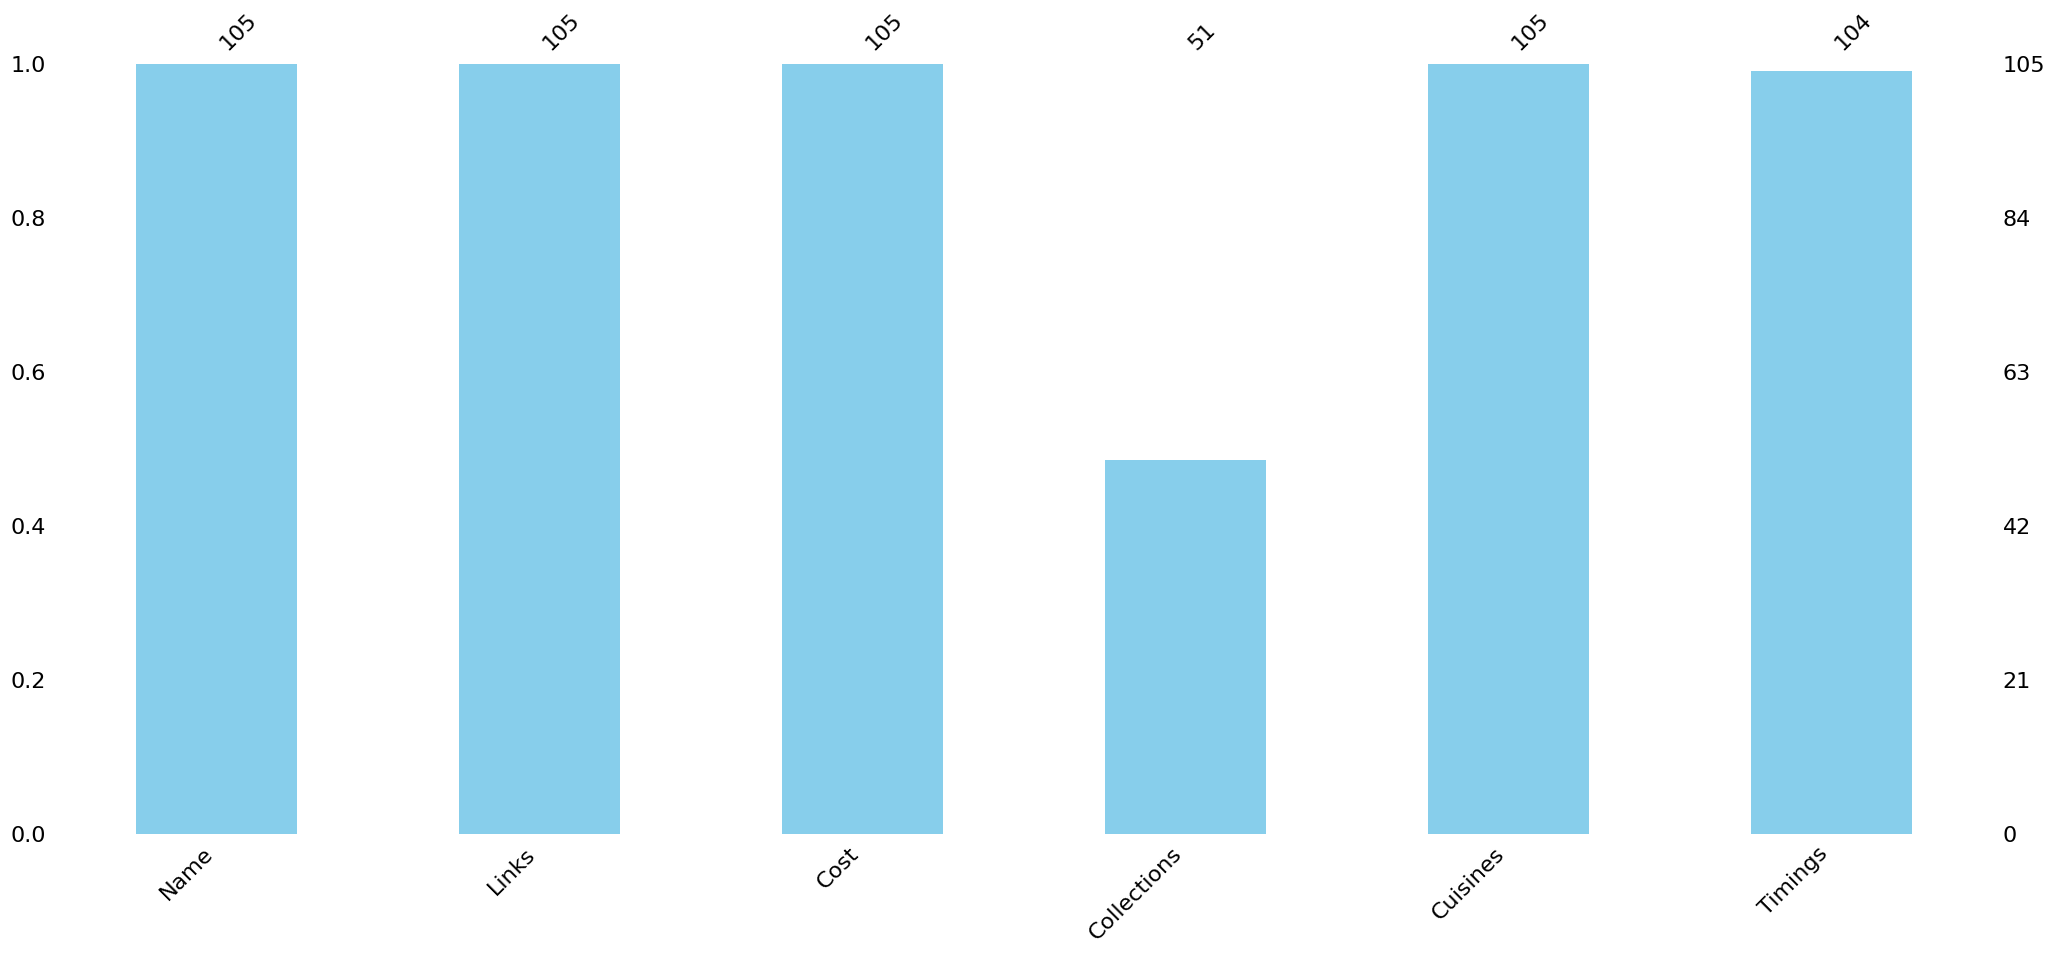

time: 982 ms (started: 2023-07-15 15:31:55 +00:00)


In [ ]:
# missing value of zamato resturant name dataset
missing_func(df_restaurant)

In [ ]:
# Check the total number of unique value of the resturent dataframe
df_restaurant['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

time: 6.65 ms (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# Change the datatype of the Cost features from object to int
df_restaurant['Cost'] = df_restaurant['Cost'].str.replace(',','').astype(int)

time: 2.15 ms (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# Check the Restaurant information
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB
time: 11.7 ms (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# Top 5 economy restaurent
df_restaurant.sort_values('Cost')[['Name','Cost']].head()[::-1]

Name  Cost
59             KS Bakers   200
101         Sweet Basket   200
54        Asian Meal Box   200
23                  Amul   150
89   Mohammedia Shawarma   150

time: 8.81 ms (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# Top 5 costly restaurent
df_restaurant.sort_values('Cost')[['Name','Cost']].tail()[::-1]

Name  Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800
56                   Feast - Sheraton Hyderabad Hotel  2500
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
18                                  10 Downing Street  1900
91            Cascade - Radisson Hyderabad Hitec City  1800

time: 9.86 ms (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# Create dataframe Restaurant name based on the price
df = df_restaurant.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()
#getting Restaurant count with another dataframe
df1 = df_restaurant.groupby('Cost')['Name'].count()
#merging together
df2 = df.merge(df1,how = 'inner',on = 'Cost')
# Rename of the columns
df2 = df2.rename(columns = {'Name_x': 'Name of Restaurent','Name_y':'Total restaurent'})

time: 18.2 ms (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# Maximum 5 hotel share same price
df2.sort_values('Total restaurent', ascending = False).head()

Cost                                 Name of Restaurent  Total restaurent
7    500  [eat.fit, KFC, Kritunga Restaurant, Karachi Ba...                13
9    600  [Behrouz Biryani, Karachi Cafe, Hyderabad Chef...                10
11   700  [Marsala Food Company, Green Bawarchi Restaura...                 8
18  1200  [Over The Moon Brew Company, The Glass Onion, ...                 7
16  1000  [Hyper Local, Tiki Shack, Pista House, La La L...                 6

time: 15.5 ms (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# minimum 5 hotel share same price
df2.sort_values('Total restaurent', ascending = False).tail()

Cost                      Name of Restaurent  Total restaurent
14   850                          [Dine O China]                 1
10   650                    [Squeeze @ The Lime]                 1
3    300              [Shah Ghouse Spl Shawarma]                 1
2    250                           [Wich Please]                 1
28  2800  [Collage - Hyatt Hyderabad Gachibowli]                 1

time: 9.58 ms (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# spliting the cusines and storing in list
cuisine_value_list = df_restaurant.Cuisines.str.split(', ')
# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1
# Converting Dictionary to DataFrame
df_cuisine = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurant'})
# top 5 cuisine
df_cuisine.sort_values('Number of Restaurant',ascending = False).head()

Cuisine  Number of Restaurant
5   North Indian                    61
0        Chinese                    43
1    Continental                    21
6        Biryani                    16
18     Fast Food                    15

time: 14 ms (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# spliting the cusines and storing in list
collection_value_list = df_restaurant.Collections.str.split(', ').dropna()
# storing all the cusines in a dict
collection_dict = {}
for collection_names in collection_value_list:
    for collection in collection_names:
        if (collection in collection_dict):
            collection_dict[collection]+=1
        else:
            collection_dict[collection]=1
# Converting Dictionary to DataFrame
df_collection = pd.DataFrame.from_dict([collection_dict]).transpose().reset_index().rename(columns={'index': 'Tags',0:'Number of Restaurant'})
# top 5 cuisine
df_collection.sort_values('Number of Restaurant',ascending = False).head()

Tags  Number of Restaurant
2                                Great Buffets                    11
0  Food Hygiene Rated Restaurants in Hyderabad                     8
5                       Live Sports Screenings                     7
6                          Hyderabad's Hottest                     7
1                          Corporate Favorites                     6

time: 18.8 ms (started: 2023-07-15 15:31:56 +00:00)


#### **Review**

In [ ]:
# Information of Review
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
time: 21.5 ms (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# Columns of the Review
df_review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

time: 3.2 ms (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# Top 5 review dataframe
df_review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

time: 13.1 ms (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# Extract the Year, Month and Date from time
df_review['Review_Year'] = pd.DatetimeIndex(df_review['Time']).year
df_review['Review_Month'] = pd.DatetimeIndex(df_review['Time']).month
df_review['Review_Day'] = pd.DatetimeIndex(df_review['Time']).day

time: 2.67 s (started: 2023-07-15 15:31:56 +00:00)


In [ ]:
# Extract Total Review and Reviewer follower from Metadata
df_review['Reviewer_total_review'],df_review['Reviewer_followers']=df_review['Metadata'].str.split(',').str
# Extract Riviewer & Followers gave the total review in numeric value in the dataframe
df_review['Reviewer_total_review'] = pd.to_numeric(df_review['Reviewer_total_review'].str.split(' ').str[0])
df_review['Reviewer_followers'] = pd.to_numeric(df_review['Reviewer_followers'].str.split(' ').str[1])

time: 61.8 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
# Unique value of rating
df_review['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

time: 4.84 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
# In order for rating checking values
df_review['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

time: 7.07 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
#since there is one rating as like converting it to 0 since no rating is 0 then to median
df_review.loc[df_review['Rating'] == 'Like'] = 0

time: 4.6 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
#changing data type for rating in review data
df_review['Rating'] = df_review['Rating'].astype('float')

time: 5.13 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
# Count the value of rating in review dataframe
df_review['Rating'].value_counts()

5.0    3832
4.0    2373
1.0    1735
3.0    1193
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
0.0       1
Name: Rating, dtype: int64

time: 9.68 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
df_review

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                          Metadata             Time  Pictures  Review_Year  \
0           1 Review , 2 Followers  5/25/2019 15:54         0       2019.0   
1          3 Reviews , 2 Followers  5/25/2019 14:20         0       2019.0   
2          2 Reviews , 3 Followers  5/24/2019 22:54         0       2019.0   
3            1 Review , 1 Follower  5/24/2019 22:11         0       2019.0   
4          3 Reviews , 2 Followers  5/24/2019 21:37         0       2019.0   
...                            ...              ...       ...          ...   
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0       2016.0   
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0       2016.0   
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3       2016.0   
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0       2016.0   
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6       2016.0   

      Review_Month  Review_Day  Reviewer_total_review  Reviewer_followers  
0              5.0        25.0                    1.0                 2.0  
1              5.0        25.0                    3.0                 2.0  
2              5.0        24.0                    2.0                 3.0  
3              5.0        24.0                    1.0                 1.0  
4              5.0        24.0                    3.0                 2.0  
...            ...         ...                    ...                 ...  
9995           6.0         5.0                   53.0                54.0  
9996           6.0         4.0                    2.0                53.0  
9997           6.0         3.0                   65.0               423.0  
9998           5.0        31.0                   13.0               144.0  
9999           5.0        31.0                  472.0              1302.0  

[10000 rows x 12 columns]

time: 23.3 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
# Average rating and total reviewer of the restaurant
avg_restaurant_rating = df_review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).rename(columns={'Reviewer' : 'Total_review'})
avg_restaurant_rating

Rating  Total_review
Restaurant                                                 
0                                        0.00             1
10 Downing Street                        3.80           100
13 Dhaba                                 3.48           100
3B's - Buddies, Bar & Barbecue           4.76           100
AB's - Absolute Barbecues                4.88           100
...                                       ...           ...
Urban Asia - Kitchen & Bar               3.65           100
Yum Yum Tree - The Arabian Food Court    3.56           100
Zega - Sheraton Hyderabad Hotel          4.45           100
Zing's Northeast Kitchen                 3.65           100
eat.fit                                  3.20           100

[101 rows x 2 columns]

time: 18.2 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
# Check the total restaurant in review dataframe
print(df_review['Restaurant'].nunique())
print('\n')

101


time: 2.98 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
# without review restaurant
restaurant_without_review = [i for i in df_restaurant['Name'].unique() if i not in df_review['Restaurant'].unique()]
restaurant_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

time: 51.1 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
# Top 5 restaurent on the basis of the rating
avg_restaurant_rating.sort_values('Rating',ascending = False).head()

Rating  Total_review
Restaurant                                          
AB's - Absolute Barbecues         4.88           100
B-Dubs                            4.81           100
3B's - Buddies, Bar & Barbecue    4.76           100
Paradise                          4.70           100
Flechazo                          4.66           100

time: 8.68 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
# Top 5 restaurent on the basis of the rating
avg_restaurant_rating.sort_values('Rating',ascending = False).tail()

Rating  Total_review
Restaurant                            
Mathura Vilas       2.82           100
Pakwaan Grand       2.71           100
Asian Meal Box      2.58           100
Hotel Zara Hi-Fi    2.40           100
0                   0.00             1

time: 9.39 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
#Finding the most followed critic
most_followed_reviewer = df_review.groupby('Reviewer').agg({'Reviewer_total_review':'max',
      'Reviewer_followers':'max', 'Rating':'mean'[:5]}).reset_index().rename(columns = {'Rating':'Average Rating'}).sort_values('Reviewer_followers',ascending = False)

time: 30.3 ms (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
#Finding the top 5 most followed critic
most_followed_reviewer.head()

Reviewer  Reviewer_total_review  Reviewer_followers  \
5464    Satwinder Singh                  186.0             13410.0   
1702         Eat_vth_me                   60.0             13320.0   
5236       Samar Sardar                    8.0             11329.0   
1788  Foodies Hyderabad                   31.0              9494.0   
6230           Srinivas                   34.0              7628.0   

      Average Rating  
5464        3.666667  
1702        5.000000  
5236        3.500000  
1788        4.500000  
6230        3.714286

time: 12.6 ms (started: 2023-07-15 15:31:59 +00:00)


#### **Null Value**

##### **Treatment of Null Value of Restaurant Dataset**

missing_value  % of missing values Data_Type
Name                     0             0.000000    object
Links                    0             0.000000    object
Cost                     0             0.000000     int64
Collections             54            51.428571    object
Cuisines                 0             0.000000    object
Timings                  1             0.952381    object

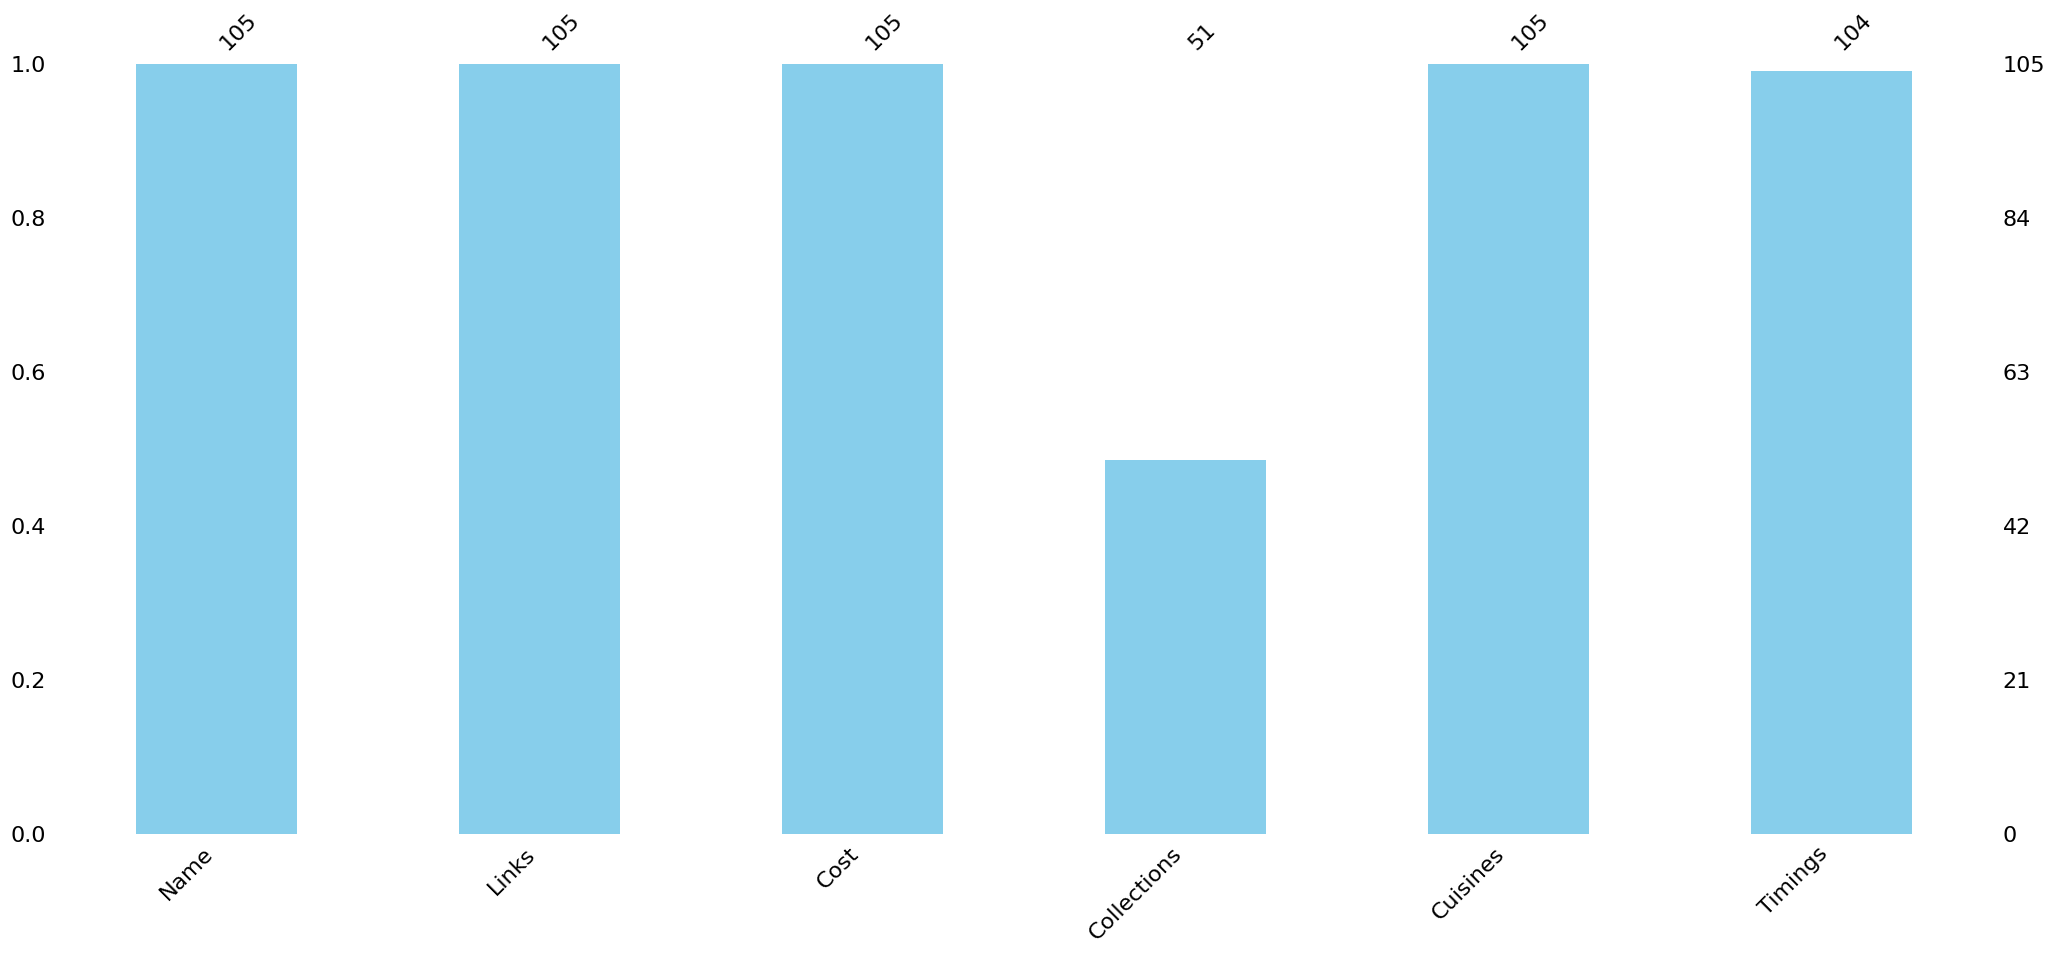

time: 1.22 s (started: 2023-07-15 15:31:59 +00:00)


In [ ]:
# Check the missing Value in Restaurant
missing_func(df_restaurant)

Here we can see that in collection feature having 51.42% of missing value, then it is best for drop the null value in the restaurant dataset.

In [ ]:
# Drop null value in the resturant dataset
df_restaurant.drop('Collections',axis = 1,inplace= True)

time: 1.7 ms (started: 2023-07-15 15:32:01 +00:00)


In [ ]:
# Again Check the Null Value
df_restaurant.isna().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     1
dtype: int64

time: 8.31 ms (started: 2023-07-15 15:32:01 +00:00)


Here we wiil say that Timing feature having only one null value so it will fill it null value with mode value.

In [ ]:
#filling null value in timings column
df_restaurant['Timings'].fillna(df_restaurant['Timings'].mode()[0], inplace = True)

time: 1.94 ms (started: 2023-07-15 15:32:01 +00:00)


In [ ]:
# Again Check the Null Value
df_restaurant.isna().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

time: 6.23 ms (started: 2023-07-15 15:32:01 +00:00)


So it is claear that there is no null value in the restaurant dataset.

In [ ]:
# Check the duplicate value of the restaurant dataset
print(df_restaurant.duplicated().sum())
print('\n')

0


time: 7.46 ms (started: 2023-07-15 15:32:01 +00:00)


So it is claear that there is no duplicate value in the restaurant dataset.

##### **Treatment of Null Value of Review Dataset**

In [ ]:
# Information of Review Dataset
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant             10000 non-null  object 
 1   Reviewer               9962 non-null   object 
 2   Review                 9955 non-null   object 
 3   Rating                 9962 non-null   float64
 4   Metadata               9962 non-null   object 
 5   Time                   9962 non-null   object 
 6   Pictures               10000 non-null  int64  
 7   Review_Year            9962 non-null   float64
 8   Review_Month           9962 non-null   float64
 9   Review_Day             9962 non-null   float64
 10  Reviewer_total_review  9962 non-null   float64
 11  Reviewer_followers     8384 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 937.6+ KB
time: 46 ms (started: 2023-07-15 15:32:01 +00:00)


missing_value  % of missing values Data_Type
Restaurant                         0                 0.00    object
Reviewer                          38                 0.38    object
Review                            45                 0.45    object
Rating                            38                 0.38   float64
Metadata                          38                 0.38    object
Time                              38                 0.38    object
Pictures                           0                 0.00     int64
Review_Year                       38                 0.38   float64
Review_Month                      38                 0.38   float64
Review_Day                        38                 0.38   float64
Reviewer_total_review             38                 0.38   float64
Reviewer_followers              1616                16.16   float64

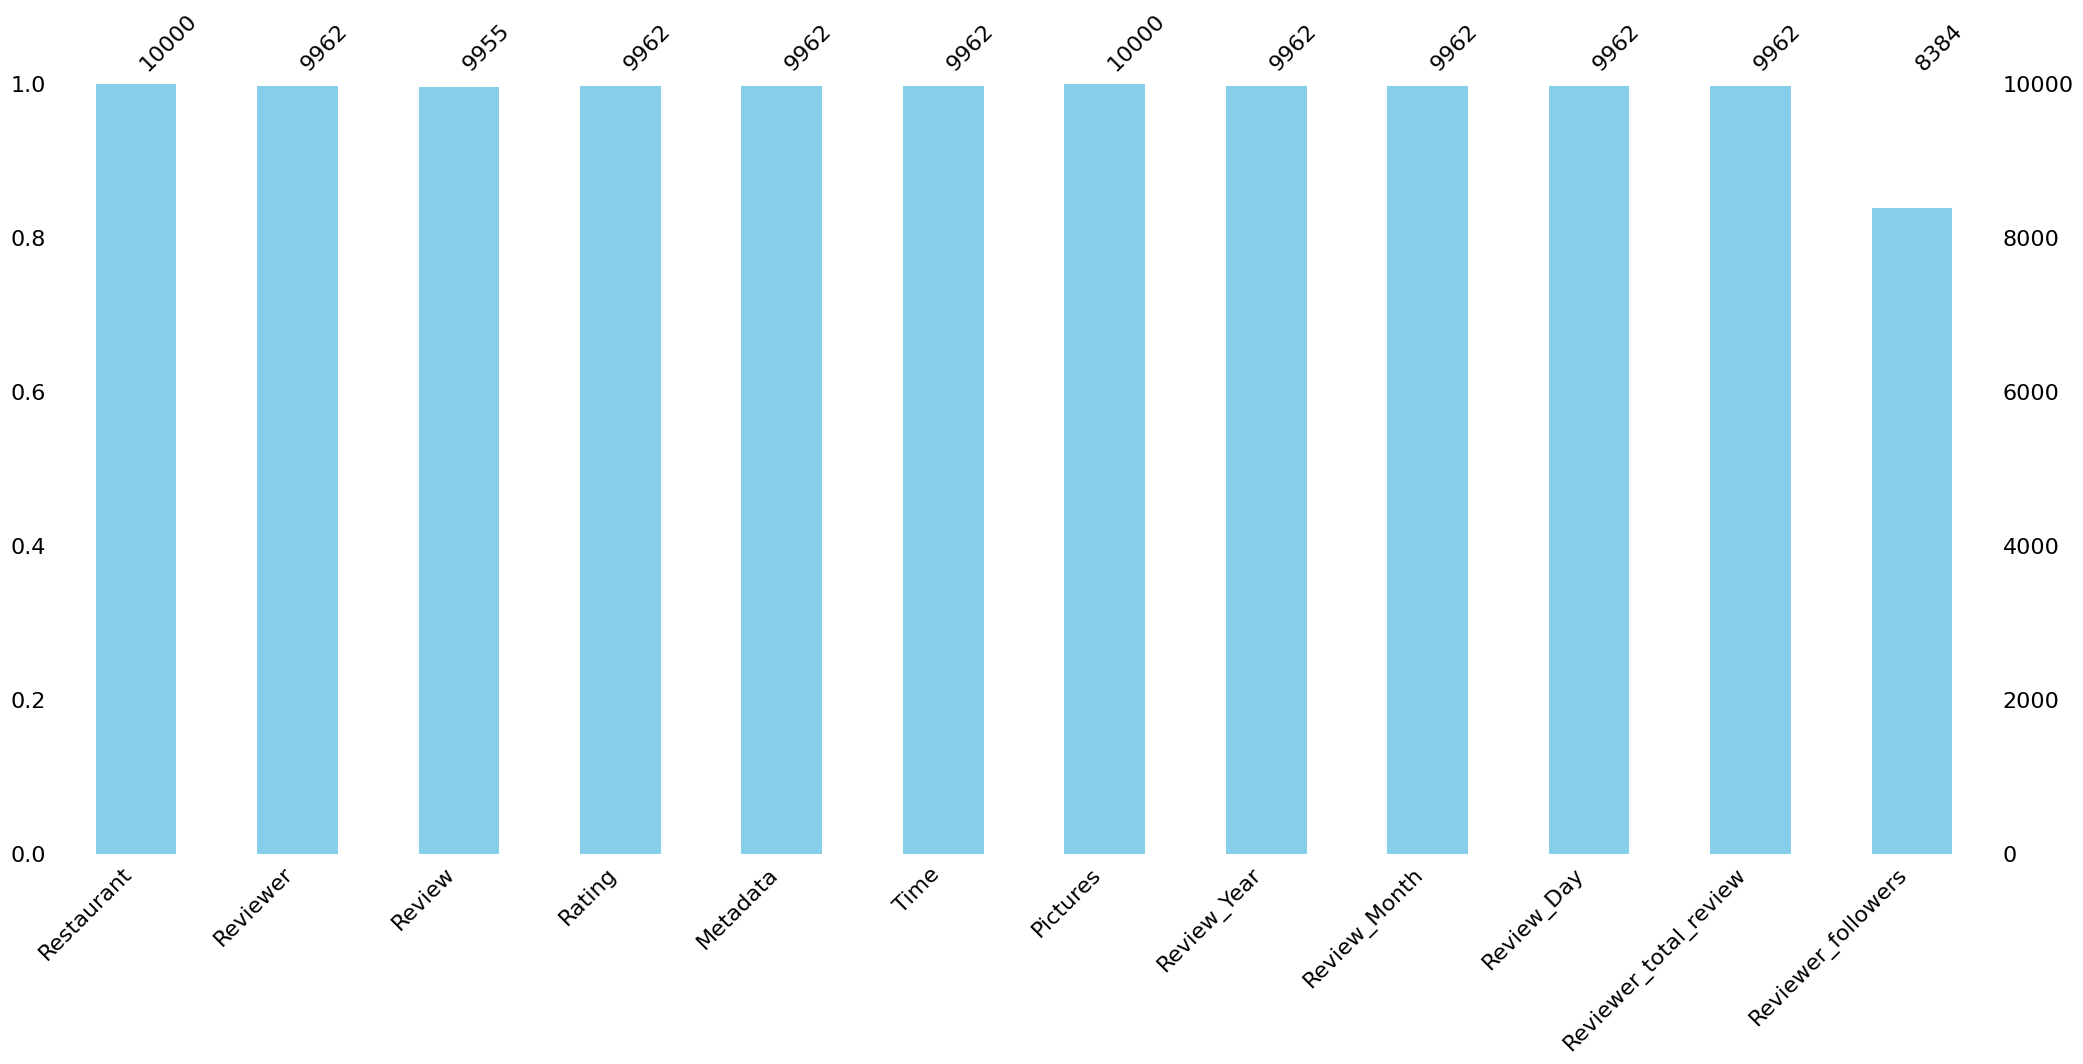

time: 3.87 s (started: 2023-07-15 15:32:01 +00:00)


In [ ]:
# Check the missing value of the review dataset
missing_func(df_review)

Here we can see that there are some missing value in the following feature:
1. Reviewer
2.  Review
3. Rating
4. Metadata
5. Time
6. Review_Year
7. Review_Month
8. Review_Day
9. Review_total_review
10. Reviewer_followers



We have to fill the null values of CompetitionDistance, there are **four** options:
1. **Zero(0) :** Not effective as the corresponding values for CompetitionSinceMonth and CompetitionSinceYear are not zero.
2. **Mean :** Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.
3. **Median :** To get good results replacing with median can be a better choice.
4. **Mode :** Mode can also help to fill the null values in our case.

Since, we have two options(Mode and Median) we are going with the mode for float type of the feature.

In [ ]:
# Treatment of missing value of the float type data with mode value
null_list = [ i for i in df_review.columns if df_review[i].dtypes == 'float64']
n = null_list.index('Reviewer_followers')
null_list.pop(n)
null_list
for i in null_list:
  df_review[i].fillna(df_review[i].mode()[0],inplace = True)

time: 33.1 ms (started: 2023-07-15 15:32:05 +00:00)


In [ ]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
df_review = df_review.dropna(subset=['Reviewer','Reviewer_total_review'])

time: 32.3 ms (started: 2023-07-15 15:32:05 +00:00)


In [ ]:
#filling null values in review and reviewer follower column
df_review = df_review.fillna({"Review": "No Review", "Reviewer_followers": 0})

time: 17 ms (started: 2023-07-15 15:32:05 +00:00)


missing_value  % of missing values Data_Type
Restaurant                         0                  0.0    object
Reviewer                           0                  0.0    object
Review                             0                  0.0    object
Rating                             0                  0.0   float64
Metadata                           0                  0.0    object
Time                               0                  0.0    object
Pictures                           0                  0.0     int64
Review_Year                        0                  0.0   float64
Review_Month                       0                  0.0   float64
Review_Day                         0                  0.0   float64
Reviewer_total_review              0                  0.0   float64
Reviewer_followers                 0                  0.0   float64

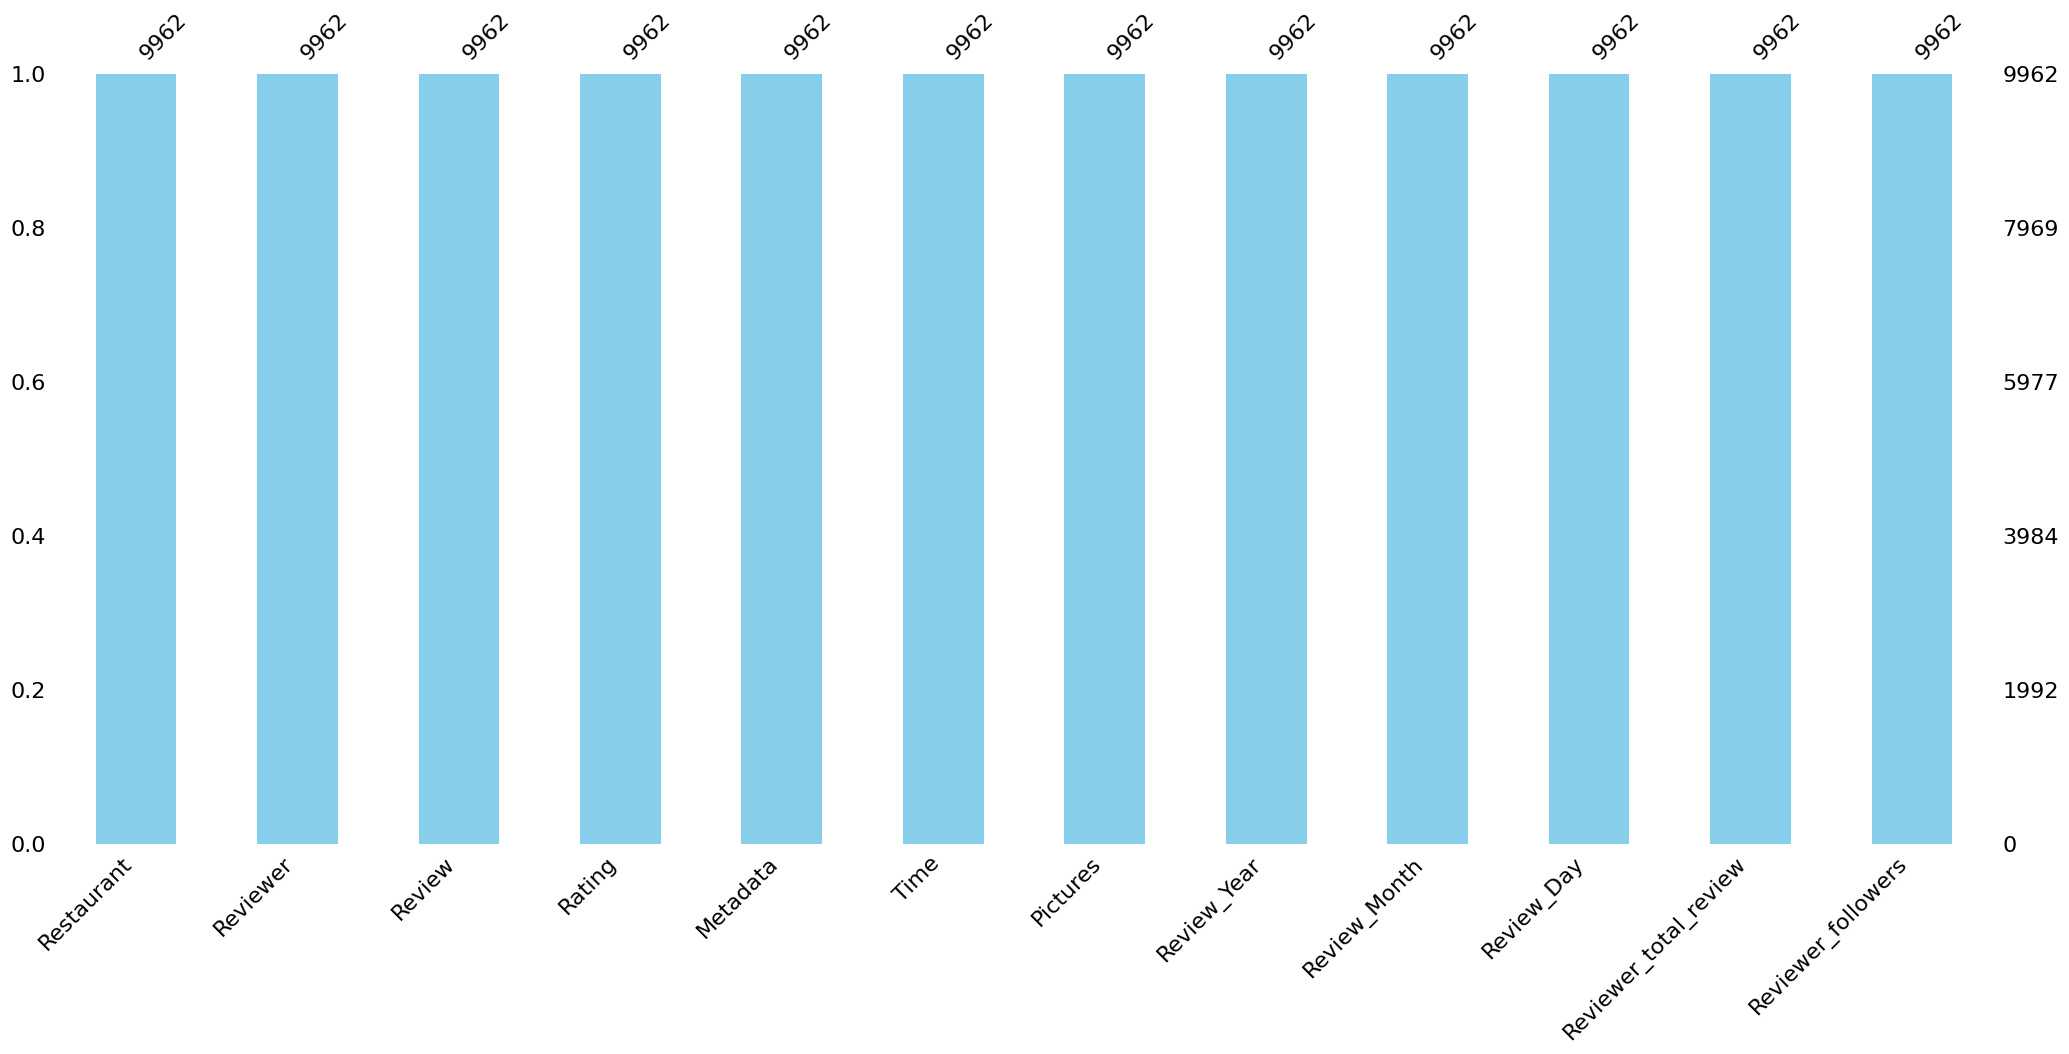

time: 3.31 s (started: 2023-07-15 15:32:05 +00:00)


In [ ]:
missing_func(df_review)

In [ ]:
# Check tje duplicate value in the review dataset
df_review.duplicated().sum()

0

time: 28.8 ms (started: 2023-07-15 15:32:08 +00:00)


#### **Merge Dataset**

In [ ]:
# In Restaurant dataset change the Name as Restaurant
df_restaurant = df_restaurant.rename(columns = {'Name' : 'Restaurant'})

time: 3.75 ms (started: 2023-07-15 15:32:08 +00:00)


In [ ]:
# checking shape of dataset using left join
df_left= pd.merge(df_restaurant, df_review, on='Restaurant', how= 'left')
print(df_left.shape)
print(f'Total number of null values obtained from left join: {df_left.isna().sum().sum()}')

# checking shape of dataset using right join
df_right= pd.merge(df_restaurant, df_review, on='Restaurant', how= 'right')
print(df_right.shape)
print(f'Total number of null values obtained from right join: {df_right.isna().sum().sum()}')


# checking shape of dataset using inner join
df_inner= pd.merge(df_restaurant, df_review, on='Restaurant', how= 'inner')
print(df_inner.shape)
print(f'Total number of null values obtained from inner join: {df_inner.isna().sum().sum()}')

# checking shape of dataset using outer join
df_outer= pd.merge(df_restaurant, df_review, on='Restaurant', how= 'outer')
print(df_outer.shape)
print(f'Total number of null values obtained from outer join: {df_outer.isna().sum().sum()}')

(9966, 16)
Total number of null values obtained from left join: 55
(9962, 16)
Total number of null values obtained from right join: 4
(9961, 16)
Total number of null values obtained from inner join: 0
(9967, 16)
Total number of null values obtained from outer join: 59
time: 547 ms (started: 2023-07-15 15:32:08 +00:00)


Since, we are obtaining the same shape and 0 null values in the inner joins therefore we can use any of the join and it won't affact the results.

We are following the inner join for our further analysis.

So we have to proceed with inner join beacuse there have no null value present in the dataset.

In [ ]:
# Shape of the merged dataset
df_inner.shape

(9961, 16)

time: 16.3 ms (started: 2023-07-15 15:32:09 +00:00)


In [ ]:
# Information of the merged dataset
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 0 to 9960
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant             9961 non-null   object 
 1   Links                  9961 non-null   object 
 2   Cost                   9961 non-null   int64  
 3   Cuisines               9961 non-null   object 
 4   Timings                9961 non-null   object 
 5   Reviewer               9961 non-null   object 
 6   Review                 9961 non-null   object 
 7   Rating                 9961 non-null   float64
 8   Metadata               9961 non-null   object 
 9   Time                   9961 non-null   object 
 10  Pictures               9961 non-null   int64  
 11  Review_Year            9961 non-null   float64
 12  Review_Month           9961 non-null   float64
 13  Review_Day             9961 non-null   float64
 14  Reviewer_total_review  9961 non-null   float64
 15  Revi

In [ ]:
# Description of the merged dataset
df_inner.describe(include= 'all')

Restaurant                                              Links  \
count              9961                                               9961   
unique              100                                                100   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                100                                                100   
mean                NaN                                                NaN   
std                 NaN                                                NaN   
min                 NaN                                                NaN   
25%                 NaN                                                NaN   
50%                 NaN                                                NaN   
75%                 NaN                                                NaN   
max                 NaN                                                NaN   

               Cost               Cuisines         Timings Reviewer Review  \
count   9961.000000                   9961            9961     9961   9961   
unique          NaN                     89              74     7446   9364   
top             NaN  North Indian, Chinese  11 AM to 11 PM   Ankita   good   
freq            NaN                    400             600       13    237   
mean     871.584178                    NaN             NaN      NaN    NaN   
std      503.425455                    NaN             NaN      NaN    NaN   
min      150.000000                    NaN             NaN      NaN    NaN   
25%      500.000000                    NaN             NaN      NaN    NaN   
50%      700.000000                    NaN             NaN      NaN    NaN   
75%     1200.000000                    NaN             NaN      NaN    NaN   
max     2800.000000                    NaN             NaN      NaN    NaN   

             Rating  Metadata             Time     Pictures  Review_Year  \
count   9961.000000      9961             9961  9961.000000  9961.000000   
unique          NaN      2477             9781          NaN          NaN   
top             NaN  1 Review  7/29/2018 20:34          NaN          NaN   
freq            NaN       919                3          NaN          NaN   
mean       3.601044       NaN              NaN     0.751431  2018.452063   
std        1.483461       NaN              NaN     2.574991     0.562496   
min        1.000000       NaN              NaN     0.000000  2016.000000   
25%        3.000000       NaN              NaN     0.000000  2018.000000   
50%        4.000000       NaN              NaN     0.000000  2018.000000   
75%        5.000000       NaN              NaN     0.000000  2019.000000   
max        5.000000       NaN              NaN    64.000000  2019.000000   

        Review_Month   Review_Day  Reviewer_total_review  Reviewer_followers  
count    9961.000000  9961.000000            9961.000000         9961.000000  
unique           NaN          NaN                    NaN                 NaN  
top              NaN          NaN                    NaN                 NaN  
freq             NaN          NaN                    NaN                 NaN  
mean        6.017970    16.107218              23.992069          163.008433  
std         3.159606     8.781835              50.617425          619.979721  
min         1.000000     1.000000               0.000000            0.000000  
25%         4.000000     9.000000               1.000000            1.000000  
50%         5.000000    16.000000               4.000000            7.000000  
75%         8.000000    24.000000              22.000000           63.000000  
max        12.000000    31.000000            1031.000000        13410.000000

time: 161 ms (started: 2023-07-15 15:32:09 +00:00)


In [ ]:
# Top 5 rows of the merged dataset
df_inner.head()

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures  Review_Year  \
0   1 Review , 2 Followers  5/25/2019 15:54         0       2019.0   
1  3 Reviews , 2 Followers  5/25/2019 14:20         0       2019.0   
2  2 Reviews , 3 Followers  5/24/2019 22:54         0       2019.0   
3    1 Review , 1 Follower  5/24/2019 22:11         0       2019.0   
4  3 Reviews , 2 Followers  5/24/2019 21:37         0       2019.0   

   Review_Month  Review_Day  Reviewer_total_review  Reviewer_followers  
0           5.0        25.0                    1.0                 2.0  
1           5.0        25.0                    3.0                 2.0  
2           5.0        24.0                    2.0                 3.0  
3           5.0        24.0                    1.0                 1.0  
4           5.0        24.0                    3.0                 2.0

time: 31.9 ms (started: 2023-07-15 15:32:09 +00:00)


In [ ]:
# Bootom 5 rows of the merged dataset
df_inner.tail()

Restaurant                                              Links  \
9956  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   
9957  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   
9958  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   
9959  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   
9960  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   

      Cost          Cuisines                            Timings  \
9956  1000  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM   
9957  1000  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM   
9958  1000  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM   
9959  1000  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM   
9960  1000  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM   

              Reviewer                                             Review  \
9956  Abhishek Mahajan  Madhumathi Mahajan Well to start with nice cou...   
9957    Sharad Agrawal  This place has never disappointed us.. The foo...   
9958         Ramandeep  Bad rating is mainly because of "Chicken Bone ...   
9959   Nayana Shanbhag  I personally love and prefer Chinese Food. Had...   
9960  Bhargava Krishna  Checked in here to try some delicious chinese ...   

      Rating                      Metadata             Time  Pictures  \
9956     3.0     53 Reviews , 54 Followers    6/5/2016 0:08         0   
9957     4.5      2 Reviews , 53 Followers   6/4/2016 22:01         0   
9958     1.5    65 Reviews , 423 Followers   6/3/2016 10:37         3   
9959     4.0    13 Reviews , 144 Followers  5/31/2016 17:22         0   
9960     3.5  472 Reviews , 1302 Followers  5/31/2016 16:41         6   

      Review_Year  Review_Month  Review_Day  Reviewer_total_review  \
9956       2016.0           6.0         5.0                   53.0   
9957       2016.0           6.0         4.0                    2.0   
9958       2016.0           6.0         3.0                   65.0   
9959       2016.0           5.0        31.0                   13.0   
9960       2016.0           5.0        31.0                  472.0   

      Reviewer_followers  
9956                54.0  
9957                53.0  
9958               423.0  
9959               144.0  
9960              1302.0

time: 32.9 ms (started: 2023-07-15 15:32:09 +00:00)


In [ ]:
# Check the duplicate value in the dataset
print(df_inner.duplicated().sum())
print()

0

time: 41.3 ms (started: 2023-07-15 15:32:09 +00:00)


missing_value  % of missing values Data_Type
Restaurant                         0                  0.0    object
Links                              0                  0.0    object
Cost                               0                  0.0     int64
Cuisines                           0                  0.0    object
Timings                            0                  0.0    object
Reviewer                           0                  0.0    object
Review                             0                  0.0    object
Rating                             0                  0.0   float64
Metadata                           0                  0.0    object
Time                               0                  0.0    object
Pictures                           0                  0.0     int64
Review_Year                        0                  0.0   float64
Review_Month                       0                  0.0   float64
Review_Day                         0                  0.0   float64
Reviewer_total_review              0                  0.0   float64
Reviewer_followers                 0                  0.0   float64

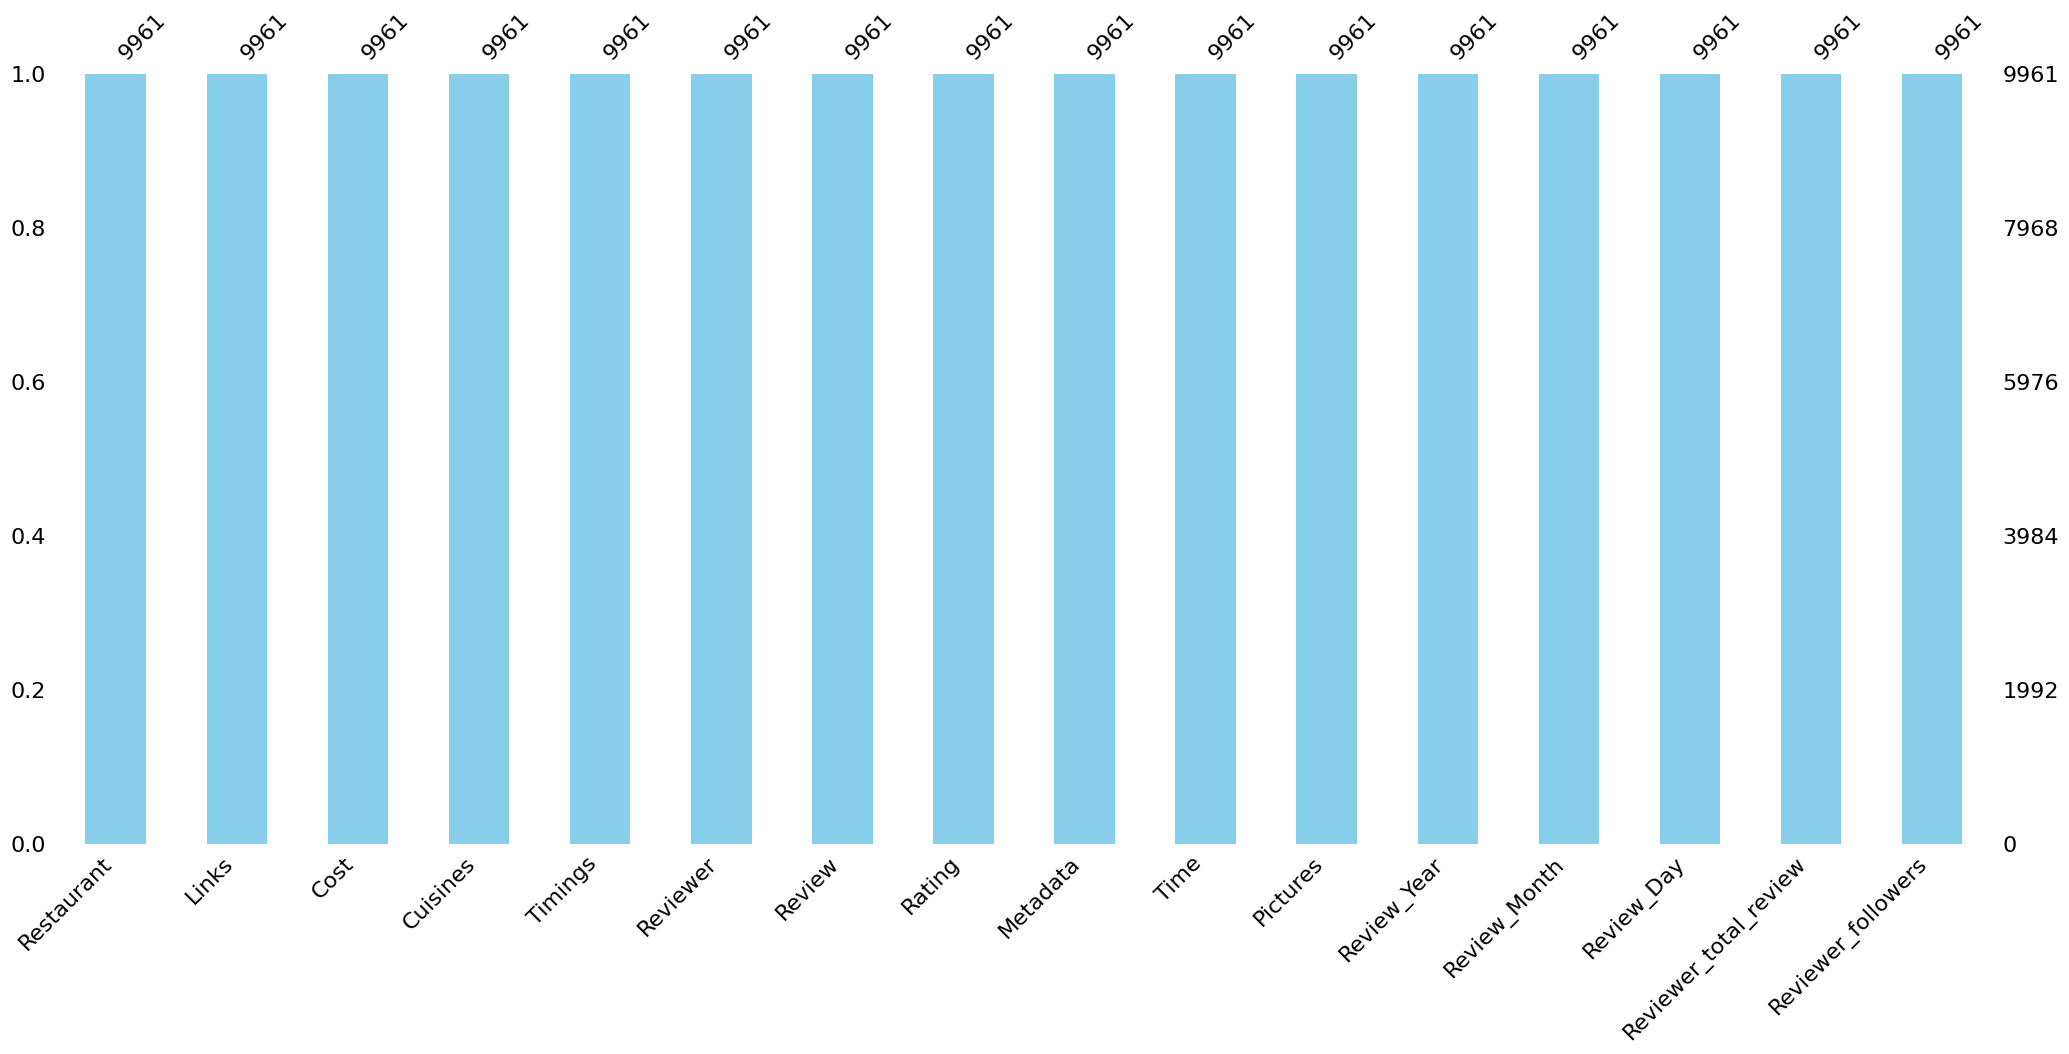

time: 2.93 s (started: 2023-07-15 15:32:09 +00:00)


In [ ]:
# Check the null value and plot the missing number
missing_func(df_inner)

We have to decide the two type of the columns list one list have contain the object datatype of the feature and other contain the numerical datatype feature.

In [ ]:
# Create list of columns
object_features = [i for i in df_inner.columns if df_inner[i].dtypes == 'object']
numerical_features = [i for i in df_inner.columns if i not in object_features]
print(object_features)
print(numerical_features)

['Restaurant', 'Links', 'Cuisines', 'Timings', 'Reviewer', 'Review', 'Metadata', 'Time']
['Cost', 'Rating', 'Pictures', 'Review_Year', 'Review_Month', 'Review_Day', 'Reviewer_total_review', 'Reviewer_followers']
time: 6.35 ms (started: 2023-07-15 15:32:12 +00:00)


In [ ]:
# Check the total number of different type of the data present in the features
for i in df_inner.columns:
  print(f'Total number of unique value in {i} is {df_inner[i].nunique()}.')

Total number of unique value in Restaurant is 100.
Total number of unique value in Links is 100.
Total number of unique value in Cost is 28.
Total number of unique value in Cuisines is 89.
Total number of unique value in Timings is 74.
Total number of unique value in Reviewer is 7446.
Total number of unique value in Review is 9364.
Total number of unique value in Rating is 9.
Total number of unique value in Metadata is 2477.
Total number of unique value in Time is 9781.
Total number of unique value in Pictures is 36.
Total number of unique value in Review_Year is 4.
Total number of unique value in Review_Month is 12.
Total number of unique value in Review_Day is 31.
Total number of unique value in Reviewer_total_review is 234.
Total number of unique value in Reviewer_followers is 751.
time: 60.9 ms (started: 2023-07-15 15:32:12 +00:00)


#### **Outliers Detection**

We have to check that outliers in the numerical features

In [ ]:
# function of the outliers detection
def outliers_detection(df):
  df = sorted(df)
  q1 = np.percentile(df,25)
  q3 = np.percentile(df,75)
  print(f'Q1 : {q1} \n Q3 : {q3}')
  iqr = q3 - q1
  print(f'Inter Quartile Range : {iqr}')
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  print(f'Lower Bound : {lower_bound} \n Upper Bound : {upper_bound}')
  outliers = [i for i in df if i < lower_bound or i > upper_bound]
  print('Length of the otliers :',len(outliers))
  percentage_of_outliers = (100*(len(outliers))/len(df))
  print(f'Percentage of outliers : {round(percentage_of_outliers,2)}%')


time: 1.18 ms (started: 2023-07-15 15:32:12 +00:00)


In [ ]:
# Find the outliers in the numerical features of the dataframe
for i in numerical_features:
  print(i)
  outliers_detection(df_inner[i])
  print('\n')

Cost
Q1 : 500.0 
 Q3 : 1200.0
Inter Quartile Range : 700.0
Lower Bound : -550.0 
 Upper Bound : 2250.0
Length of the otliers : 200
Percentage of outliers : 2.01%


Rating
Q1 : 3.0 
 Q3 : 5.0
Inter Quartile Range : 2.0
Lower Bound : 0.0 
 Upper Bound : 8.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Pictures
Q1 : 0.0 
 Q3 : 0.0
Inter Quartile Range : 0.0
Lower Bound : 0.0 
 Upper Bound : 0.0
Length of the otliers : 1983
Percentage of outliers : 19.91%


Review_Year
Q1 : 2018.0 
 Q3 : 2019.0
Inter Quartile Range : 1.0
Lower Bound : 2016.5 
 Upper Bound : 2020.5
Length of the otliers : 43
Percentage of outliers : 0.43%


Review_Month
Q1 : 4.0 
 Q3 : 8.0
Inter Quartile Range : 4.0
Lower Bound : -2.0 
 Upper Bound : 14.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Review_Day
Q1 : 9.0 
 Q3 : 24.0
Inter Quartile Range : 15.0
Lower Bound : -13.5 
 Upper Bound : 46.5
Length of the otliers : 0
Percentage of outliers : 0.0%


Reviewer_total_review
Q1 : 1.0 
 Q3 : 22.0


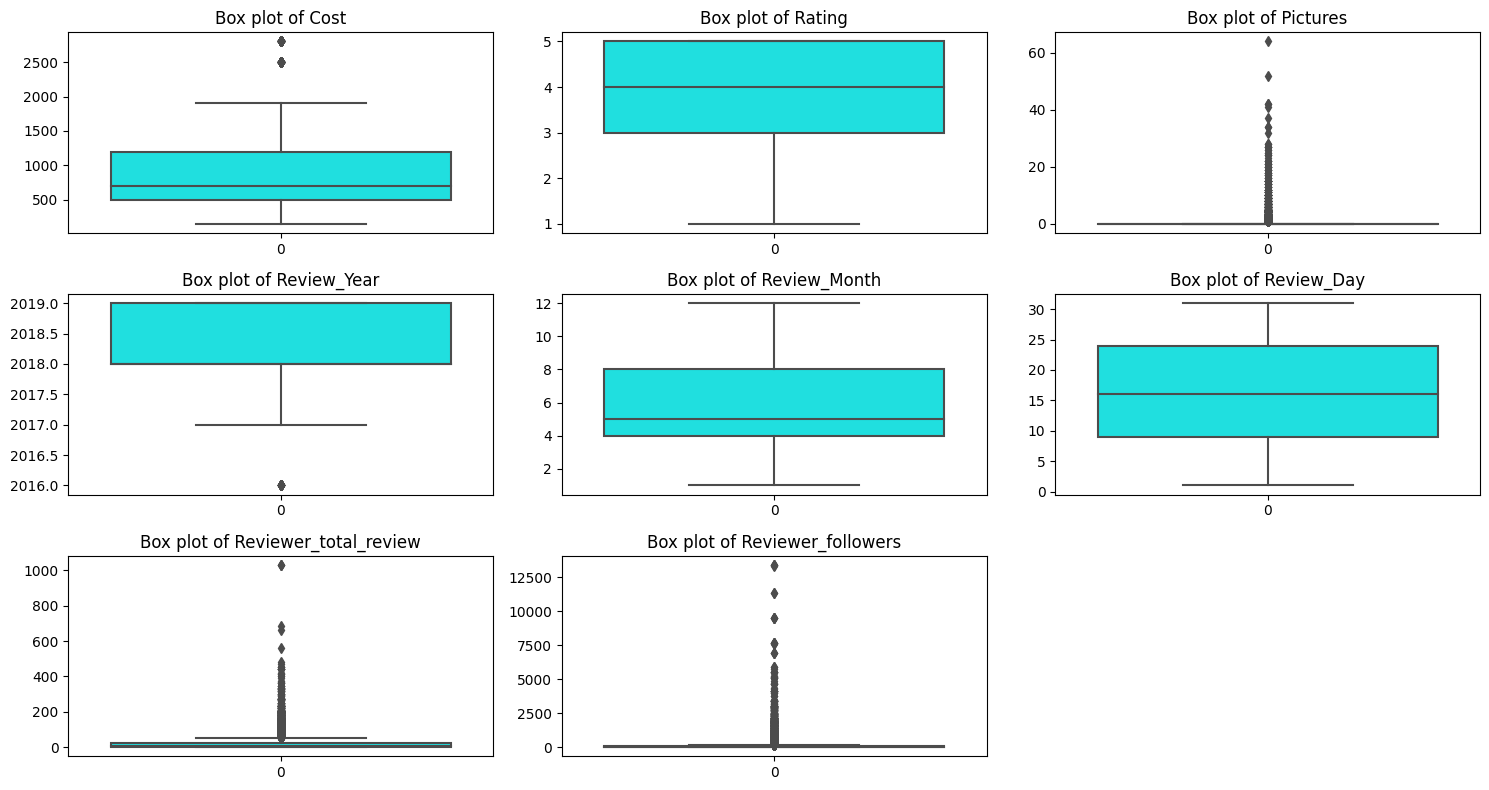

time: 3.89 s (started: 2023-07-15 15:32:13 +00:00)


In [ ]:
# Boxplot of the numerical feature to visualize the outliers
plt.figure(figsize= (15,8))
for num,col in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/3 + 1),3,num+1)
  sns.boxplot(df_inner[col],color = 'cyan').set(title= f'Box plot of {col}')
  plt.tight_layout()


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In order to visualize each chart properly we will do data visualization in a structured way following ' UBM ' rule:

*   Univariate Analysis
*   Bivariate Analysis

*   Multivariate Analysis

### **Univariate Analysis**

#### Chart - 1

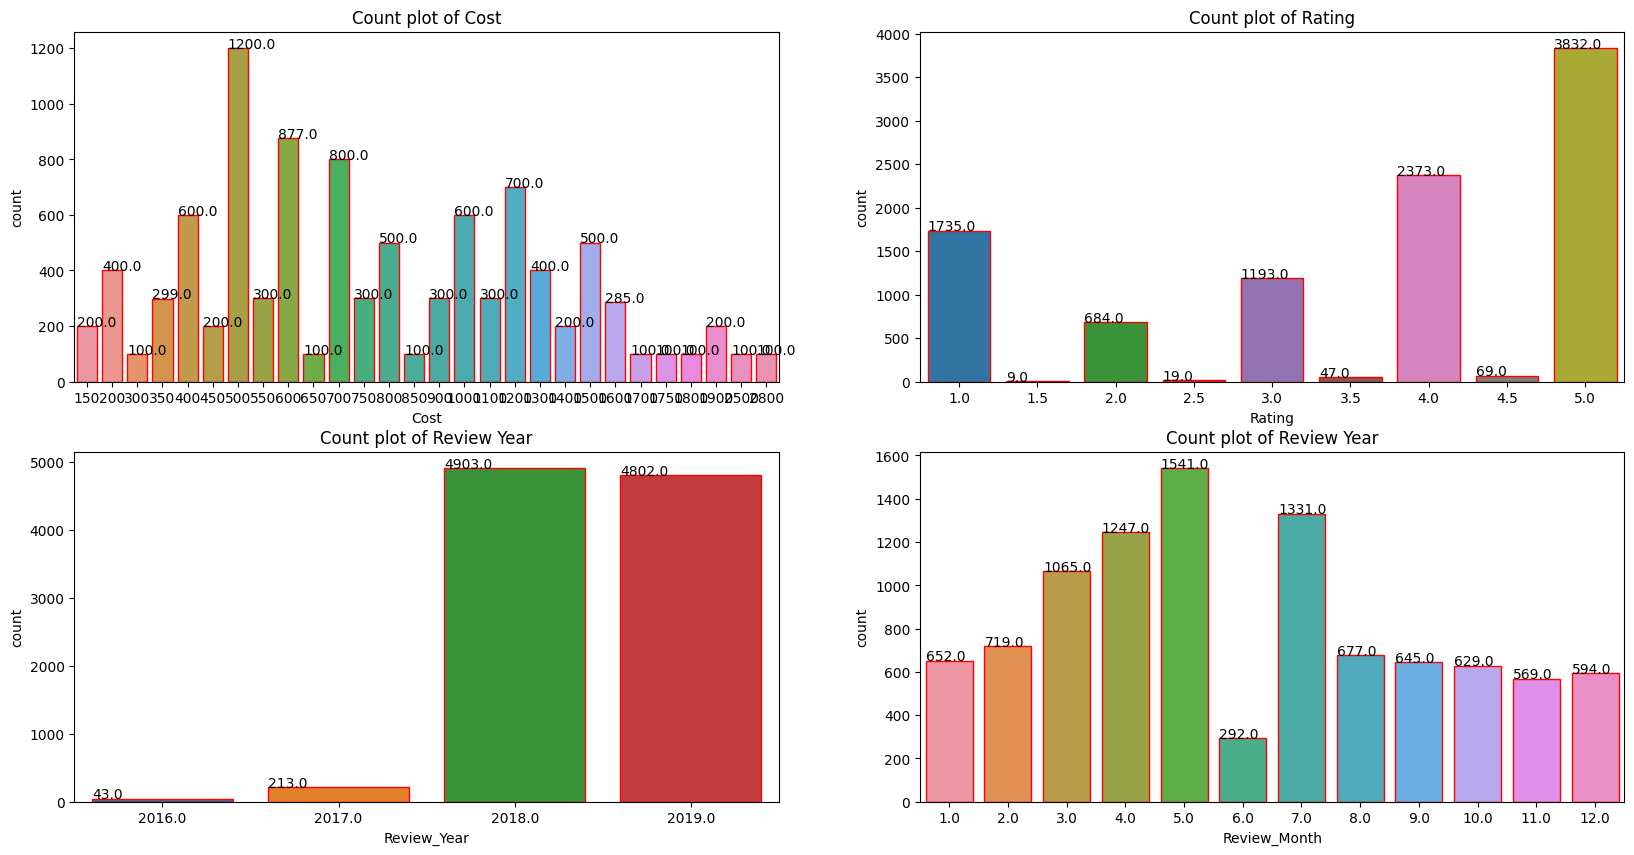

time: 4.94 s (started: 2023-07-15 15:32:17 +00:00)


In [ ]:
# Chart - 1 visualization code
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
ax = sns.countplot(x = 'Cost', data = df_inner,edgecolor = 'red')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.title ('Count plot of Cost')

plt.subplot(2,2,2)
ax = sns.countplot(x = 'Rating', data = df_inner,edgecolor = 'red')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.title ('Count plot of Rating')

plt.subplot(2,2,3)
ax = sns.countplot(x = 'Review_Year', data = df_inner,edgecolor = 'red')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.title ('Count plot of Review Year')

plt.subplot(2,2,4)
ax = sns.countplot(x = 'Review_Month', data = df_inner,edgecolor = 'red')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.title ('Count plot of Review Year')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

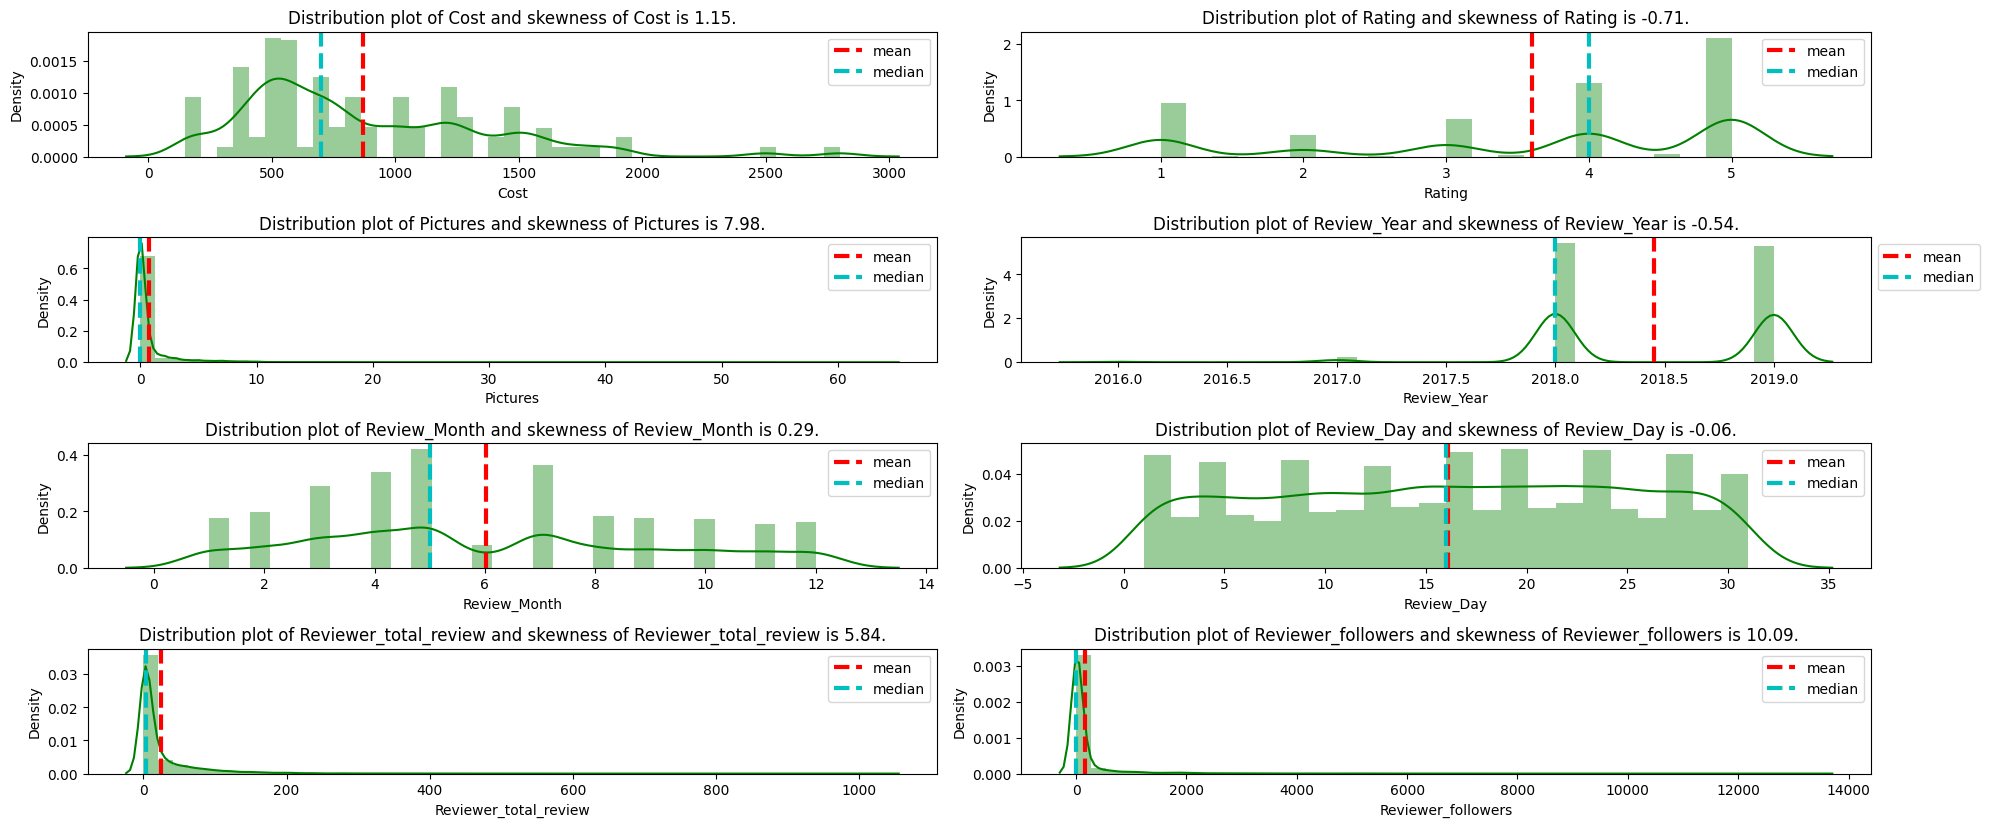

time: 10.6 s (started: 2023-07-15 15:32:22 +00:00)


In [ ]:
# Chart - 2 visualization code
plt.figure(figsize= (20,10))
for n,i in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/2 + 1),2,n+1)
  plot = sns.distplot(df_inner[i],color = 'g').set(title= f'Distribution plot of {i} and skewness of {i} is {round(df_inner[i].skew(),2)}.')
  feature = df_inner[i]
  plt.axvline(feature.mean(), color='r', linestyle='dashed', linewidth=3,label= 'mean');  #red
  plt.axvline(feature.median(), color='c', linestyle='dashed', linewidth=3,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1))
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

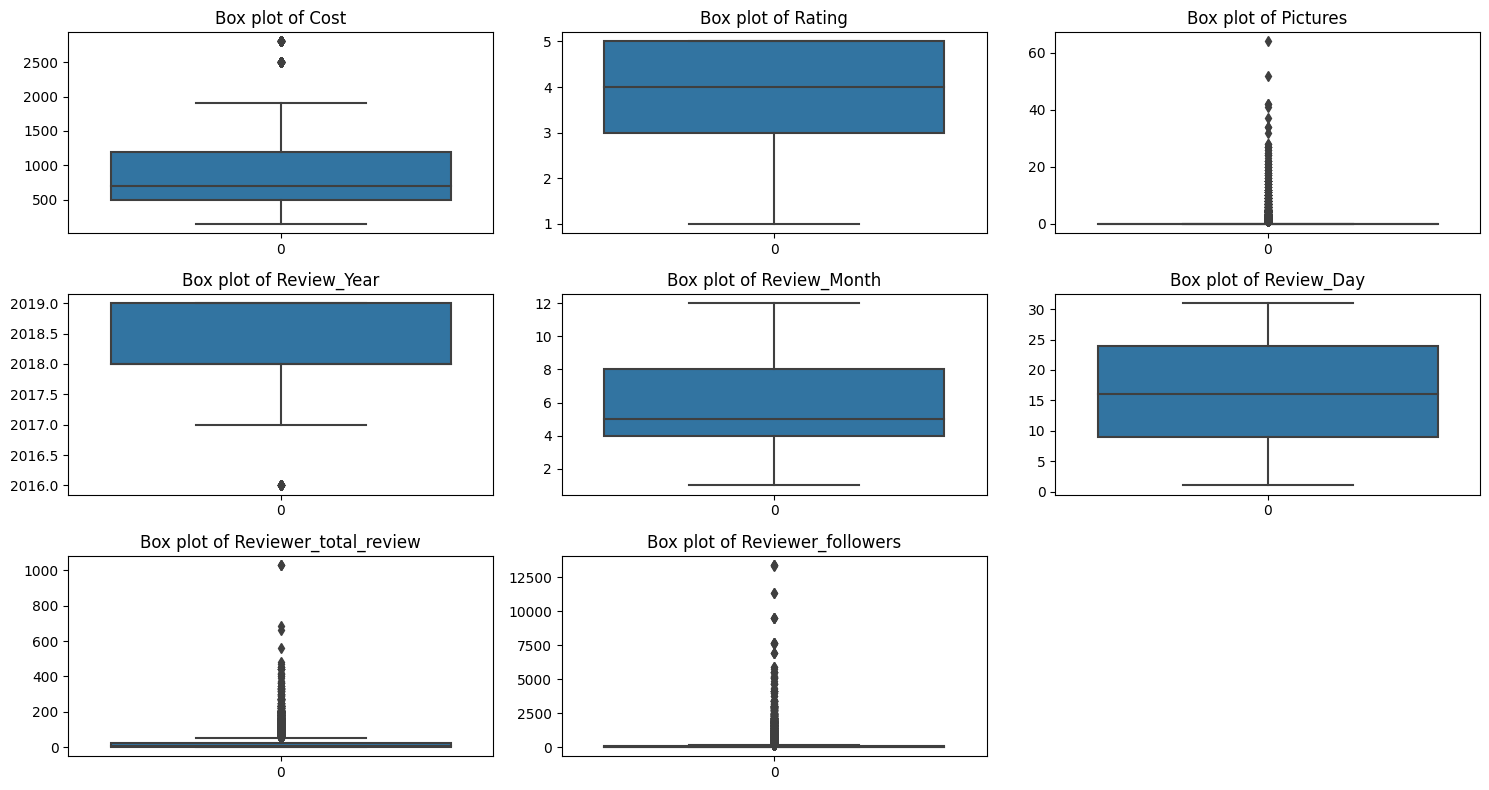

time: 5.15 s (started: 2023-07-15 15:32:32 +00:00)


In [ ]:
# Chart - 3 visualization code
plt.figure(figsize= (15,8))
for num,col in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/3 + 1),3,num+1)
  sns.boxplot(df_inner[col]).set(title= f'Box plot of {col}')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

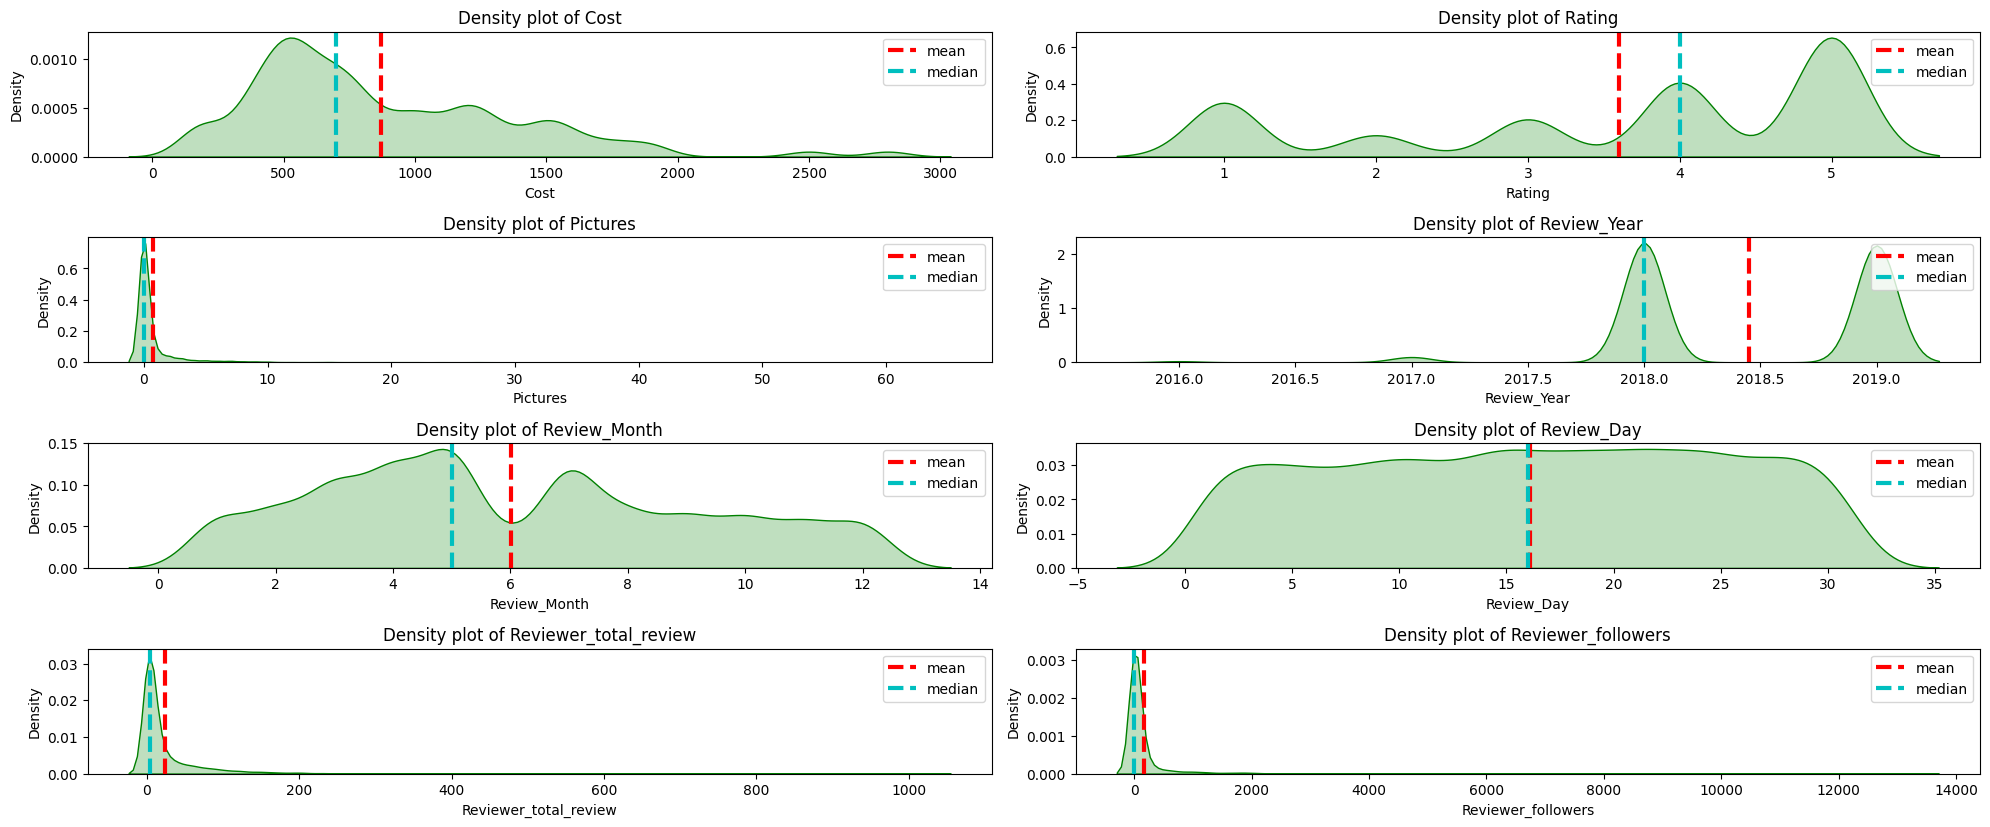

time: 4.06 s (started: 2023-07-15 15:32:37 +00:00)


In [ ]:
# Chart - 4 visualization code
plt.figure(figsize= (20,10))
for n,i in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/2 + 1),2,n+1)
  plot = sns.kdeplot(df_inner[i],color = 'g',shade = True).set(title= f'Density plot of {i}')
  feature = df_inner[i]
  plt.axvline(feature.mean(), color='r', linestyle='dashed', linewidth=3,label= 'mean');  #red
  plt.axvline(feature.median(), color='c', linestyle='dashed', linewidth=3,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1))
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

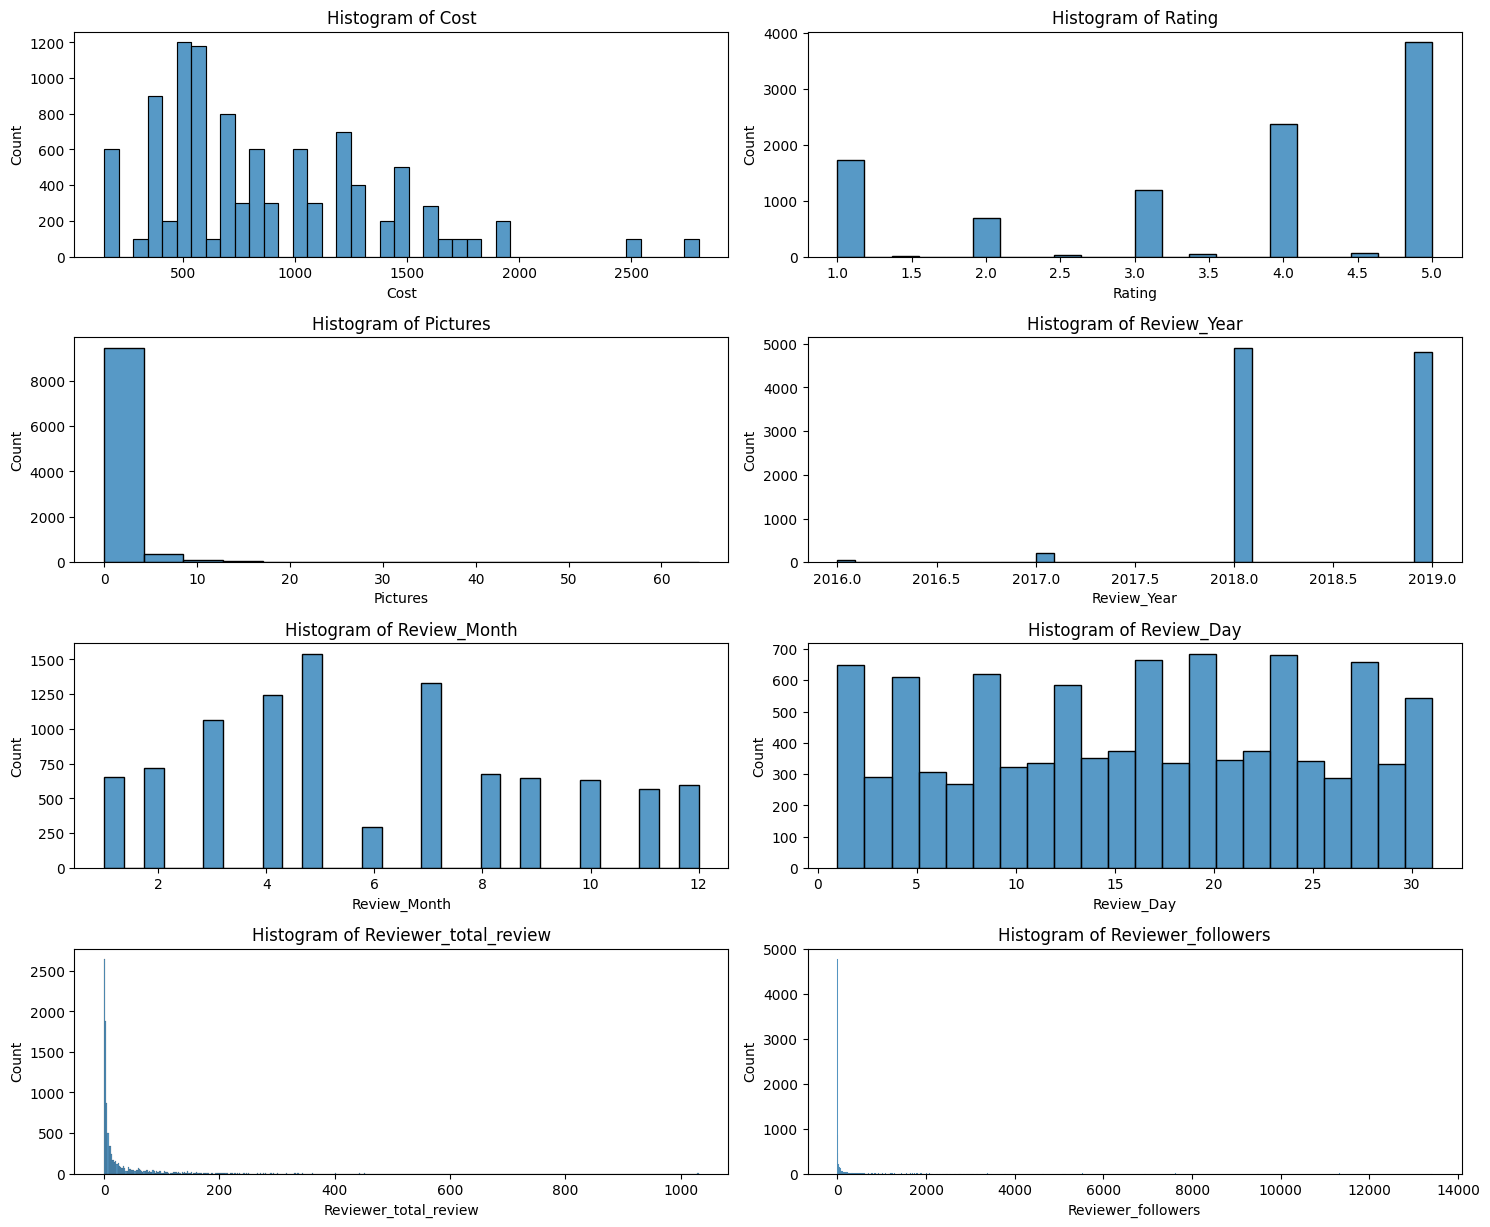

time: 9.72 s (started: 2023-07-15 15:32:42 +00:00)


In [ ]:
# Chart - 5 visualization code
plt.figure(figsize= (15,15))
for num,col in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/2 + 1),2,num + 1)
  sns.histplot(df_inner[col]).set(title= f'Histogram of {col}')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

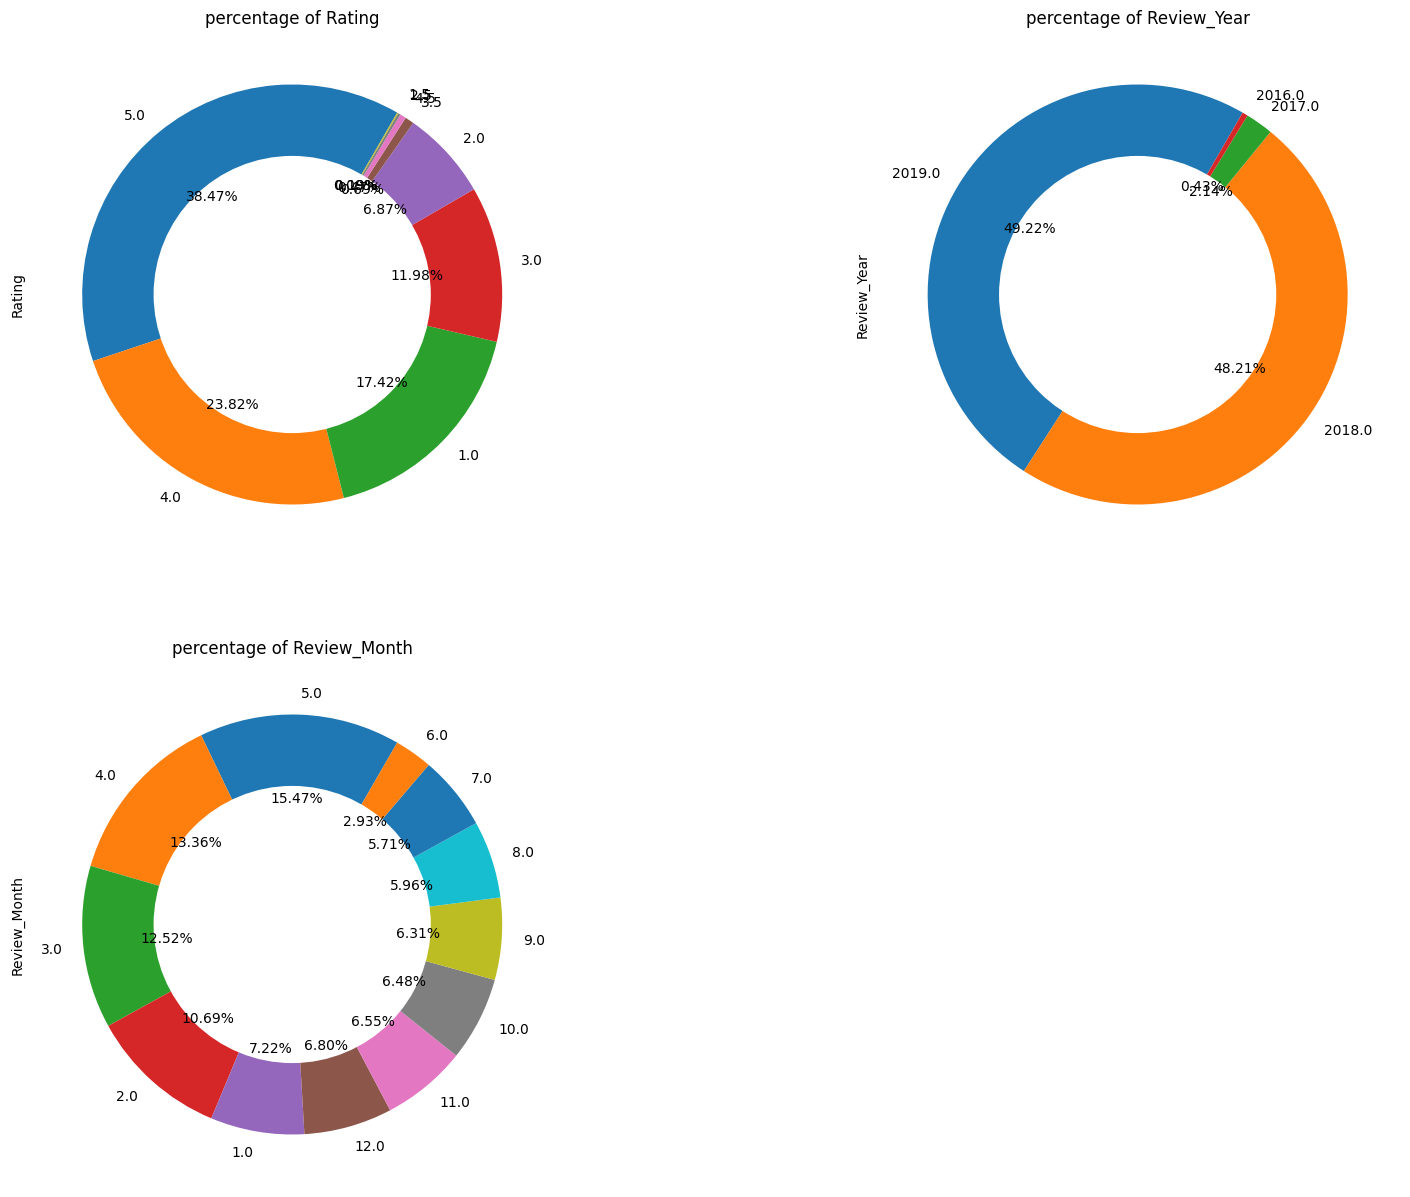

time: 626 ms (started: 2023-07-15 15:32:51 +00:00)


In [ ]:
# Chart - 6 visualization code
col = ['Rating','Review_Year','Review_Month']
plt.figure(figsize = (20,15))
for n,i in enumerate(col):
  plt.subplot(2,2,n+1)
  df_inner[i].value_counts().plot(kind='pie',
                               autopct="%1.2f%%",
                               startangle= 60,
                               shadow=False,
                               labels=df_inner[i].unique(),
                              # colors=['yellow','red'],
                               explode=[0 for i in range(len(df_inner[i].unique()))],
                               title = f'percentage of {i}'
                              )
  centre_circle = plt.Circle((0, 0), 0.66, fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.tight_layout

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Bivariate Analysis**

#### Chart - 7

In [ ]:
#Price point of restaurants
cost_point = df_inner.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index()

time: 6.87 ms (started: 2023-07-15 15:32:52 +00:00)


In [ ]:
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = cost_point.sort_values('Rating', ascending = False)

time: 1.53 ms (started: 2023-07-15 15:32:52 +00:00)


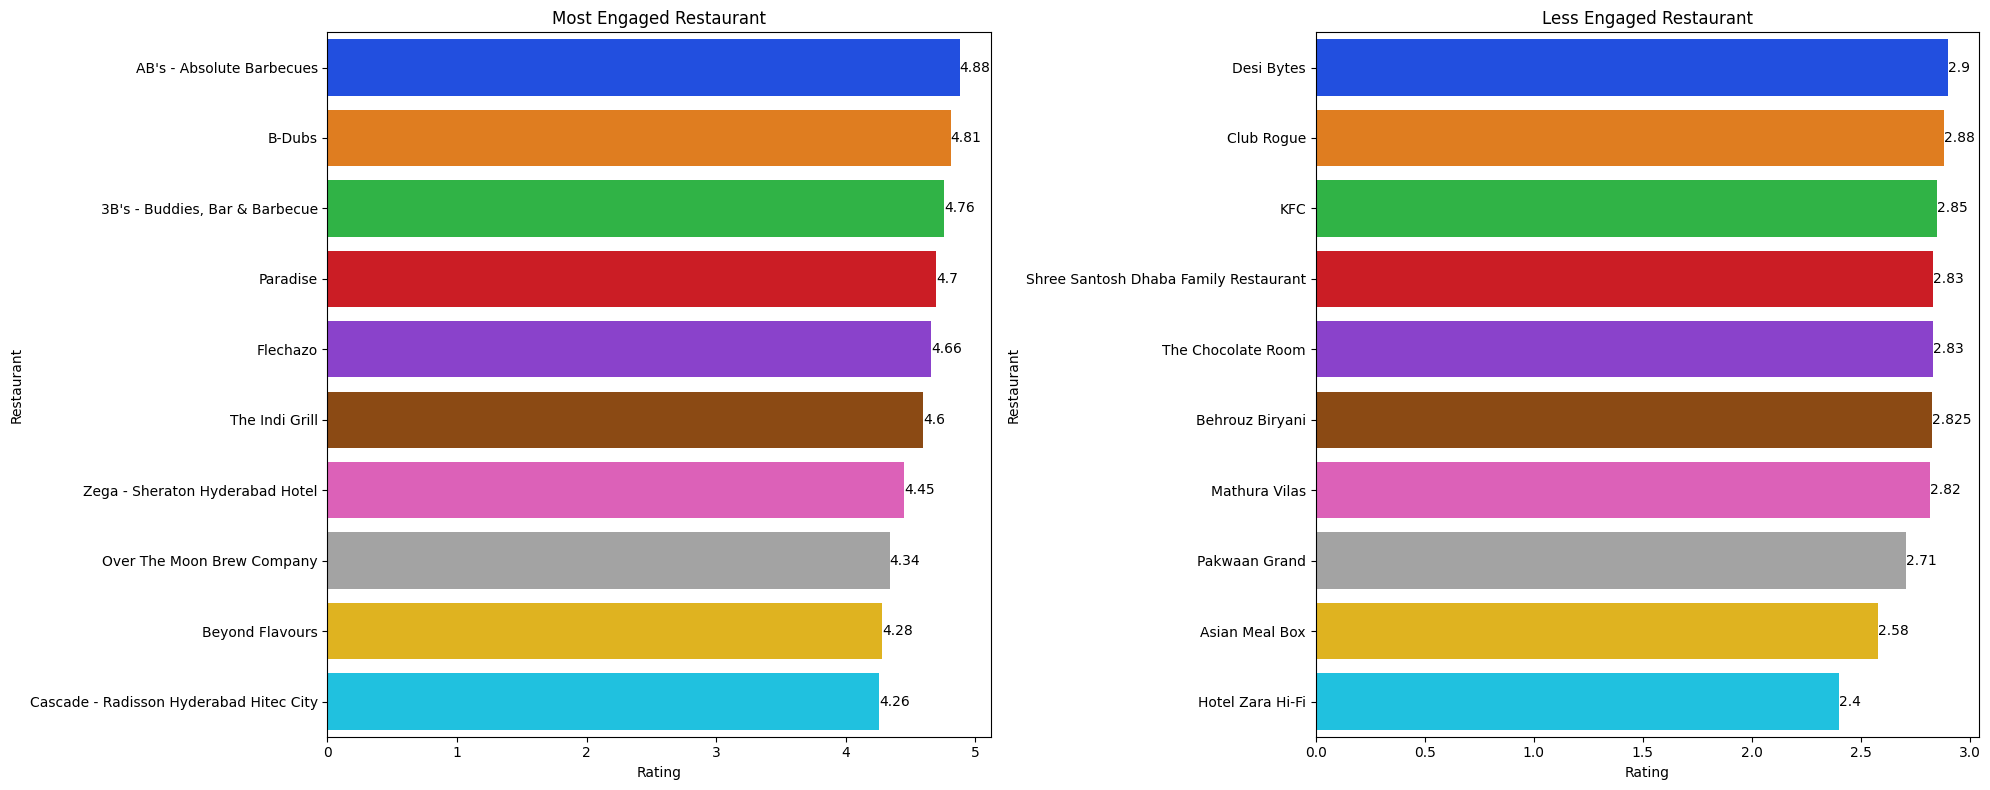

time: 813 ms (started: 2023-07-15 15:32:52 +00:00)


In [ ]:
# Chart - 7- visualization code for most liked
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plot = sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant',palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Most Engaged Restaurant')
plt.subplot(1,2,2)
plot = sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant',palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Less Engaged Restaurant')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Extract the restaurant name and its cost
cost_of_restaurant = df_restaurant.sort_values('Cost',ascending= False)[['Restaurant','Cost']]

time: 2.62 ms (started: 2023-07-15 15:32:53 +00:00)


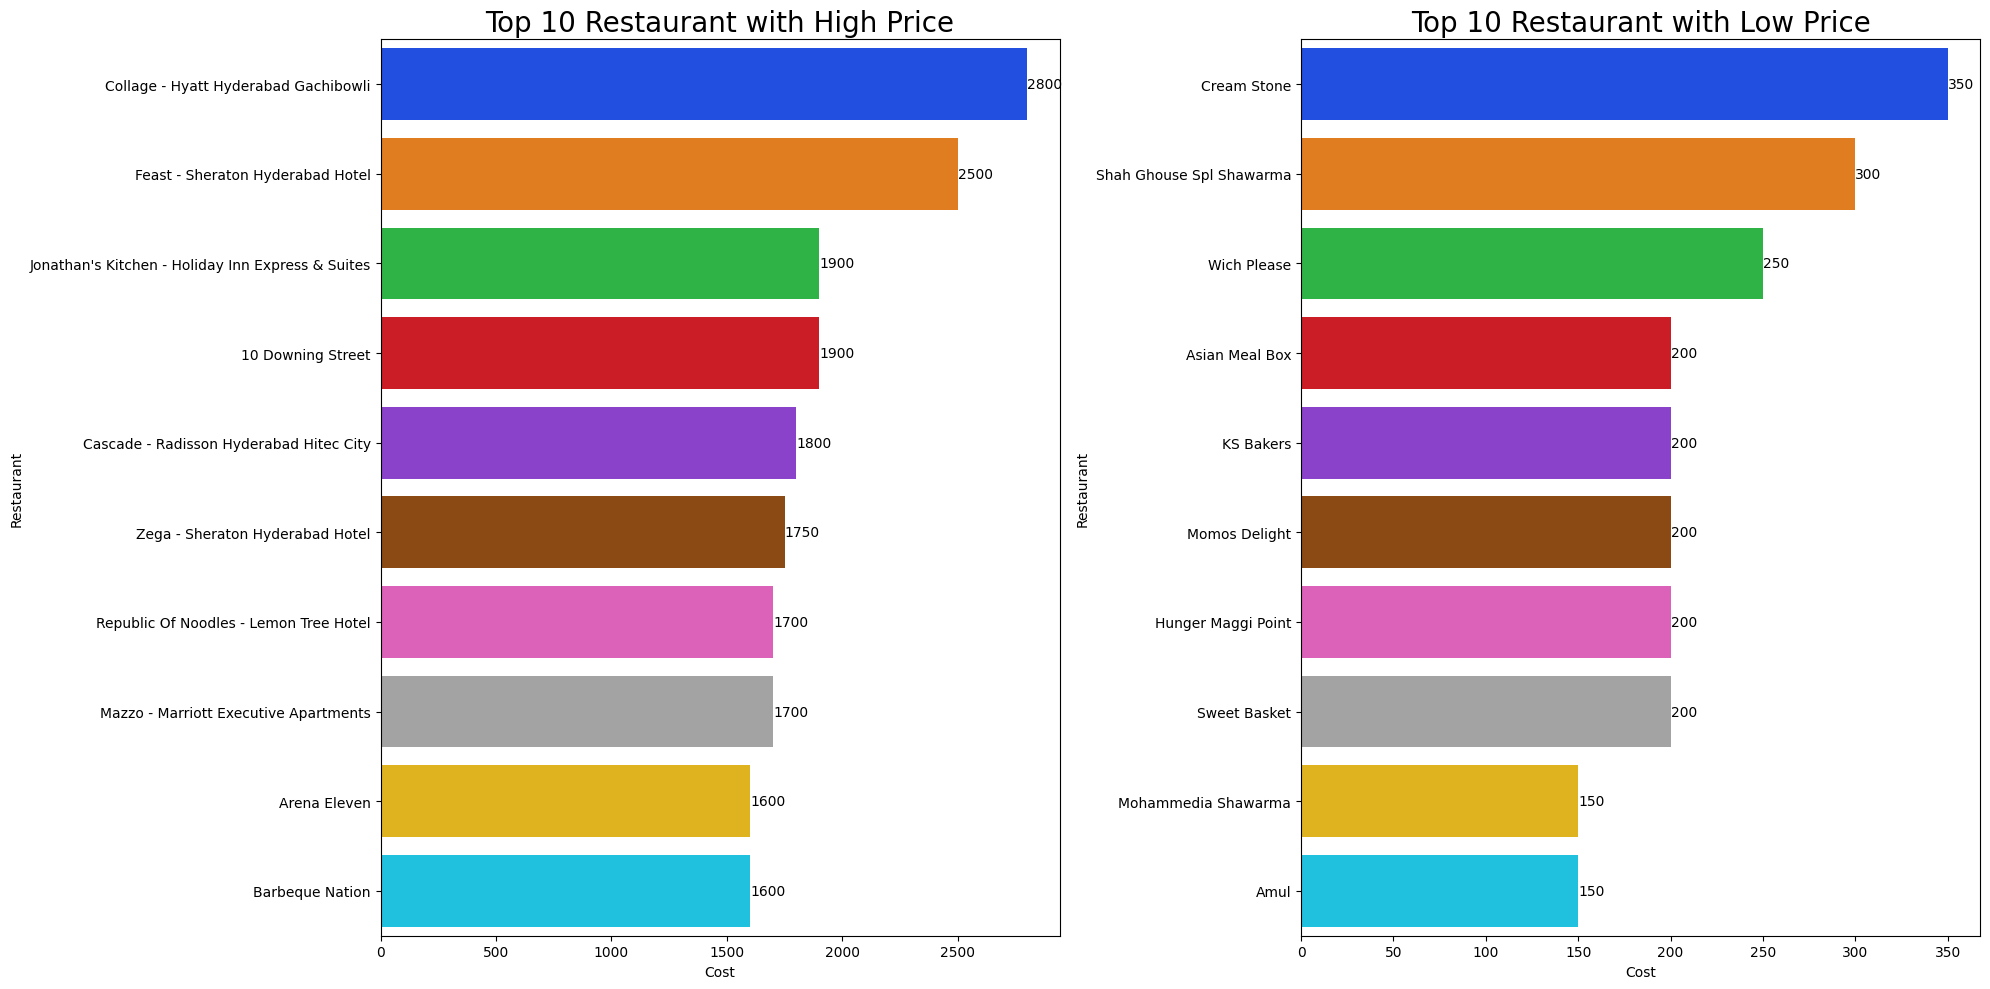

time: 831 ms (started: 2023-07-15 15:32:53 +00:00)


In [ ]:
# Chart - 8 visualization code
plt.figure(figsize= (20,10))
plt.subplot(1,2,1)
plot = sns.barplot(x='Cost',y= 'Restaurant',data= cost_of_restaurant[:10],palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Top 10 Restaurant with High Price',size = 20)
plt.subplot(1,2,2)
plot = sns.barplot(x='Cost',y= 'Restaurant',data= cost_of_restaurant[-10:],palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Top 10 Restaurant with Low Price',size = 20)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
#merging average rating and cost to find rating for expensive hotel
expected_revenue = avg_restaurant_rating.merge(df_restaurant[['Restaurant','Cost']], on = 'Restaurant')
#calculating expected revenue based on total review recieved
expected_revenue['Expected_Revenue'] = expected_revenue['Total_review'] * expected_revenue['Cost']

time: 8.78 ms (started: 2023-07-15 15:32:54 +00:00)


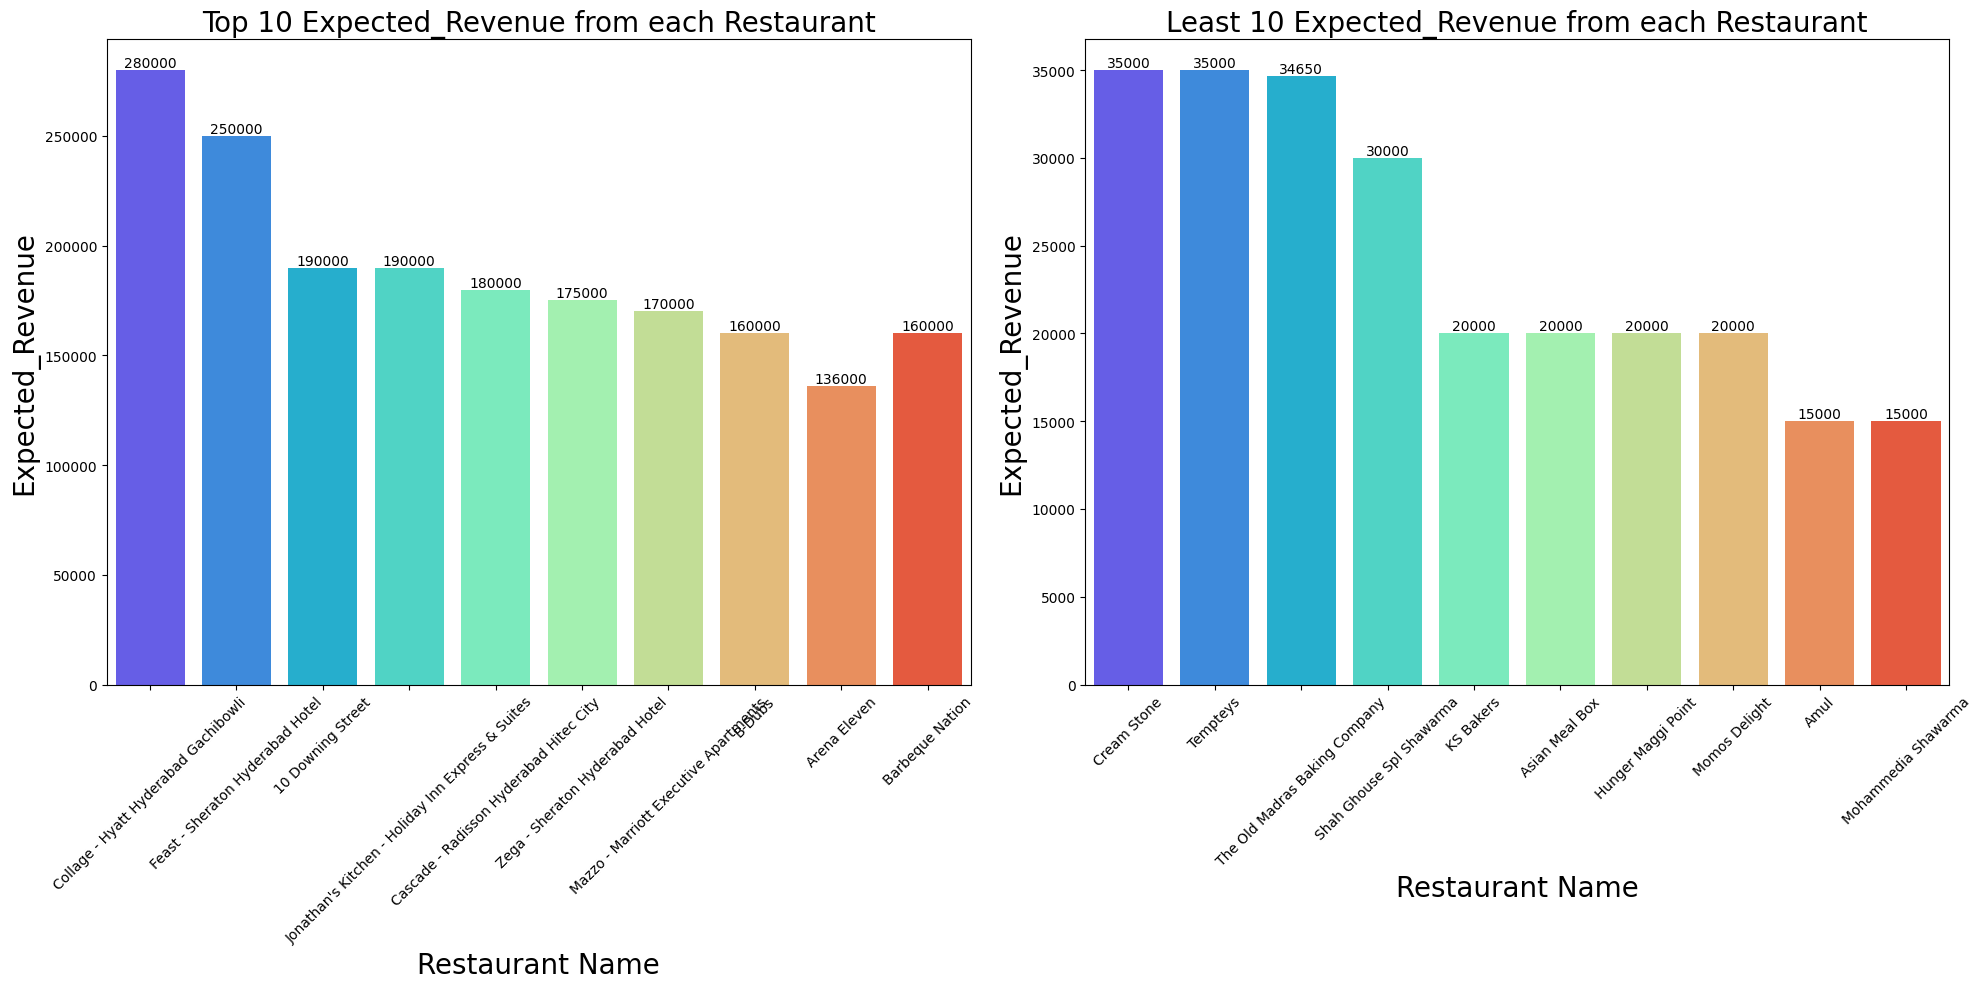

time: 1.12 s (started: 2023-07-15 15:32:54 +00:00)


In [ ]:
# Chart - 9 visualization code
fig = plt.figure(figsize=[20,10])
data = expected_revenue.sort_values('Cost', ascending  = False)
plt.subplot(1,2,1)
plot = sns.barplot(data= data[:10], x='Restaurant', y= 'Expected_Revenue', palette ="rainbow")
plot.bar_label(plot.containers[0])
plt.title("Top 10 Expected_Revenue from each Restaurant", size = 20)
plt.xlabel('Restaurant Name', size = 20)
plt.xticks(rotation=45)
plt.ylabel('Expected_Revenue', size = 20)
plt.subplot(1,2,2)
plot = sns.barplot(data= data[-10:], x='Restaurant', y= 'Expected_Revenue', palette ="rainbow")
plot.bar_label(plot.containers[0])
plt.title("Least 10 Expected_Revenue from each Restaurant", size = 20)
plt.xlabel('Restaurant Name', size = 20)
plt.xticks(rotation=45)
plt.ylabel('Expected_Revenue', size = 20)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
most_followed_reviewer.columns

Index(['Reviewer', 'Reviewer_total_review', 'Reviewer_followers',
       'Average Rating'],
      dtype='object')

time: 8.04 ms (started: 2023-07-15 15:32:55 +00:00)


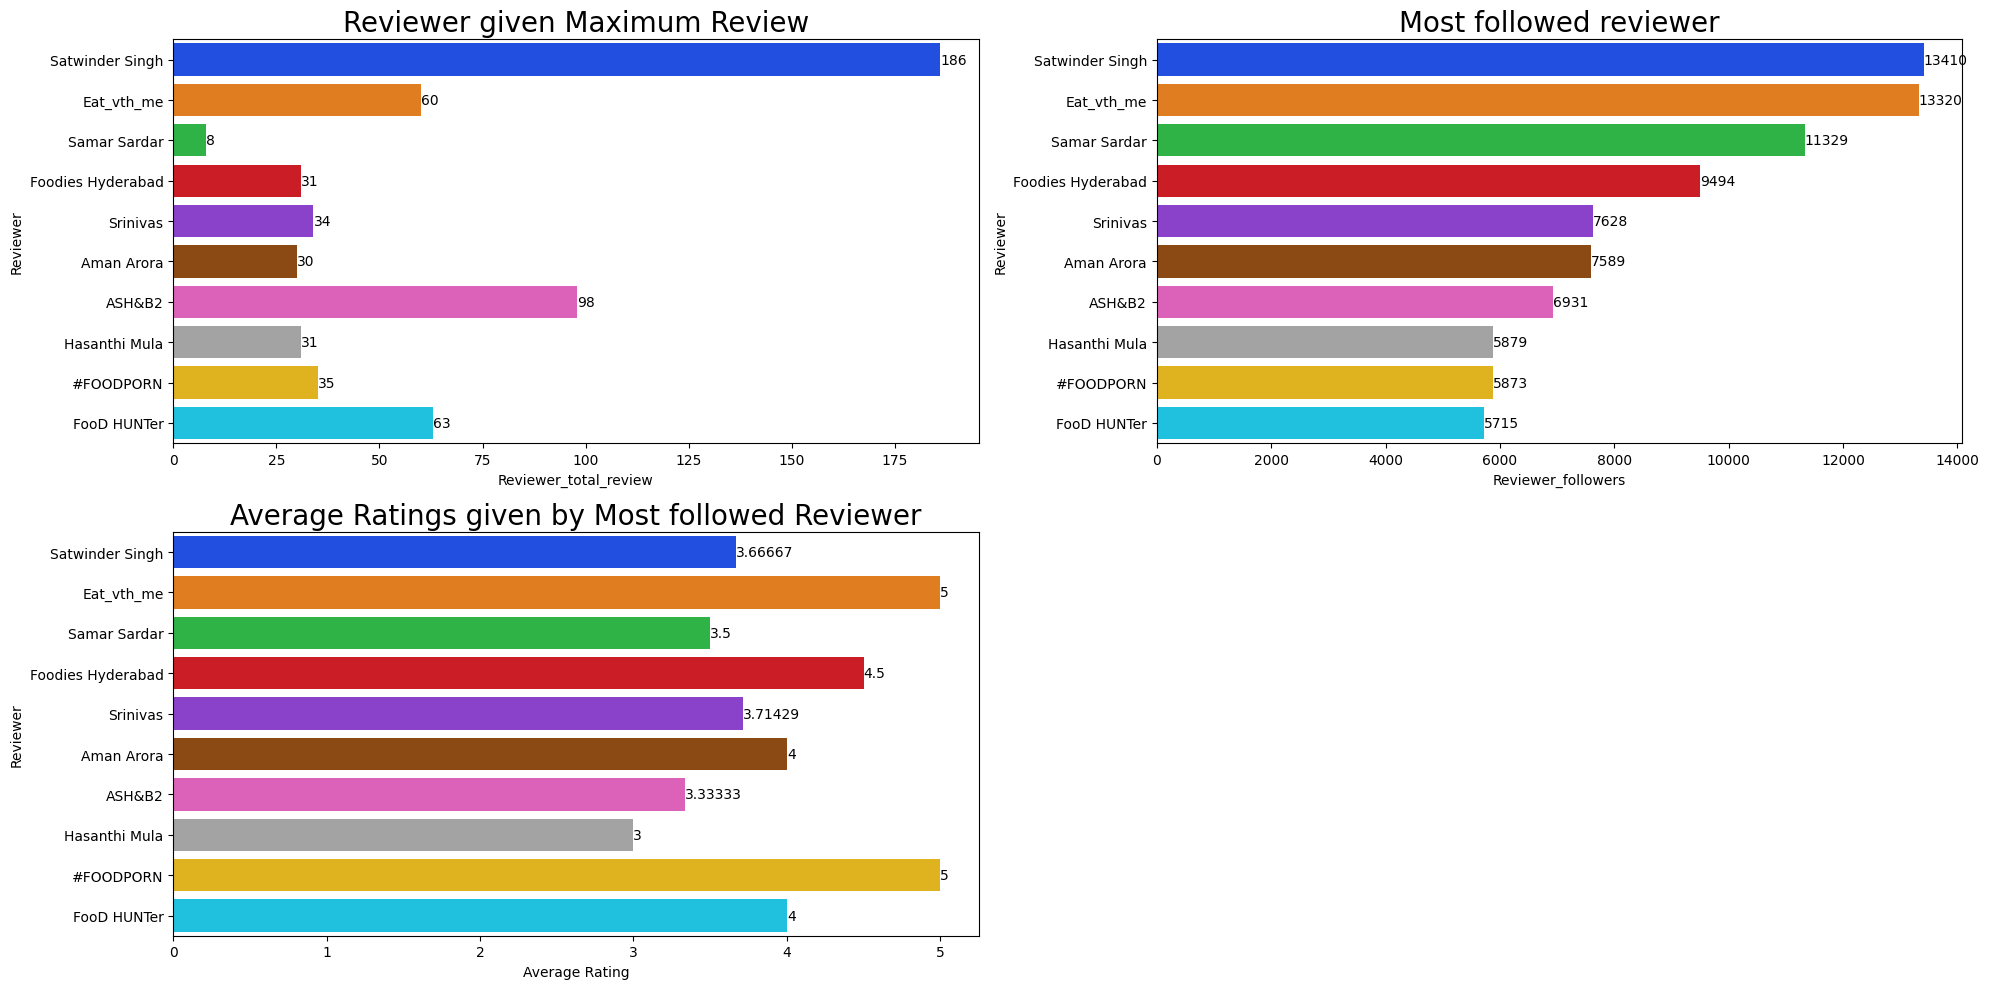

time: 1.2 s (started: 2023-07-15 15:32:55 +00:00)


In [ ]:
# Chart - 10 visualization code
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plot = sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_total_review',y = 'Reviewer', palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Reviewer given Maximum Review',size = 20)
plt.subplot(2,2,2)
plot = sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_followers',y = 'Reviewer', palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Most followed reviewer',size = 20)
plt.subplot(2,2,3)
plot = sns.barplot(data = most_followed_reviewer[:10], x = 'Average Rating',y = 'Reviewer', palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Average Ratings given by Most followed Reviewer',size = 20)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

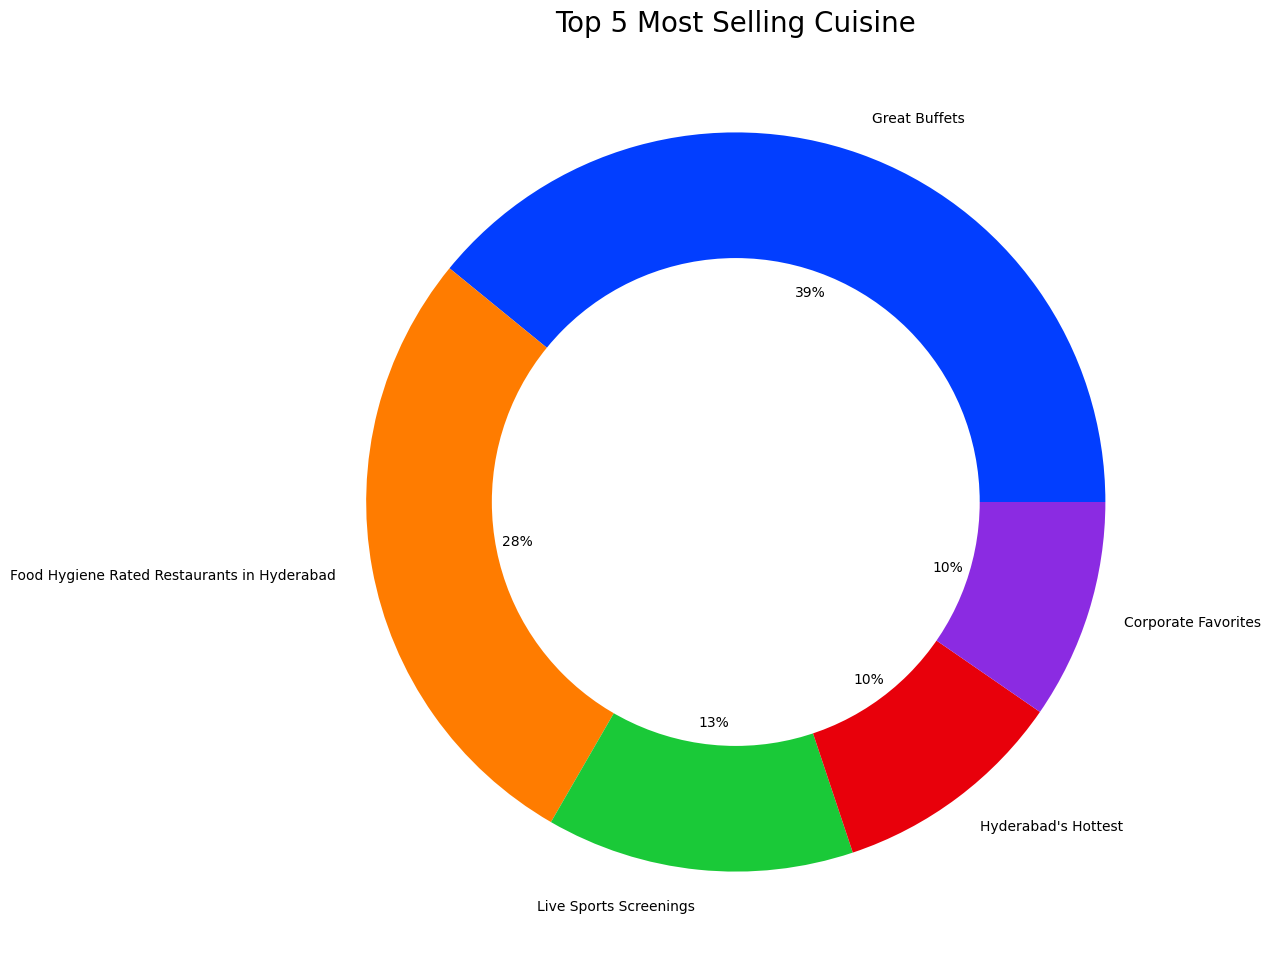

time: 254 ms (started: 2023-07-15 15:32:56 +00:00)


In [ ]:
# Chart - 11 visualization code
data = df_cuisine.sort_values('Number of Restaurant', ascending = False)['Number of Restaurant'].tolist()[:5]
labels = df_collection.sort_values('Number of Restaurant',ascending = False)['Tags'].tolist()[:5]

#define Seaborn color palette to use
colors = sns.color_palette('bright')[:5]

#create ring chart
plt.figure(figsize = (15,12))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =20)
centre_circle = plt.Circle((0, 0), 0.66, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

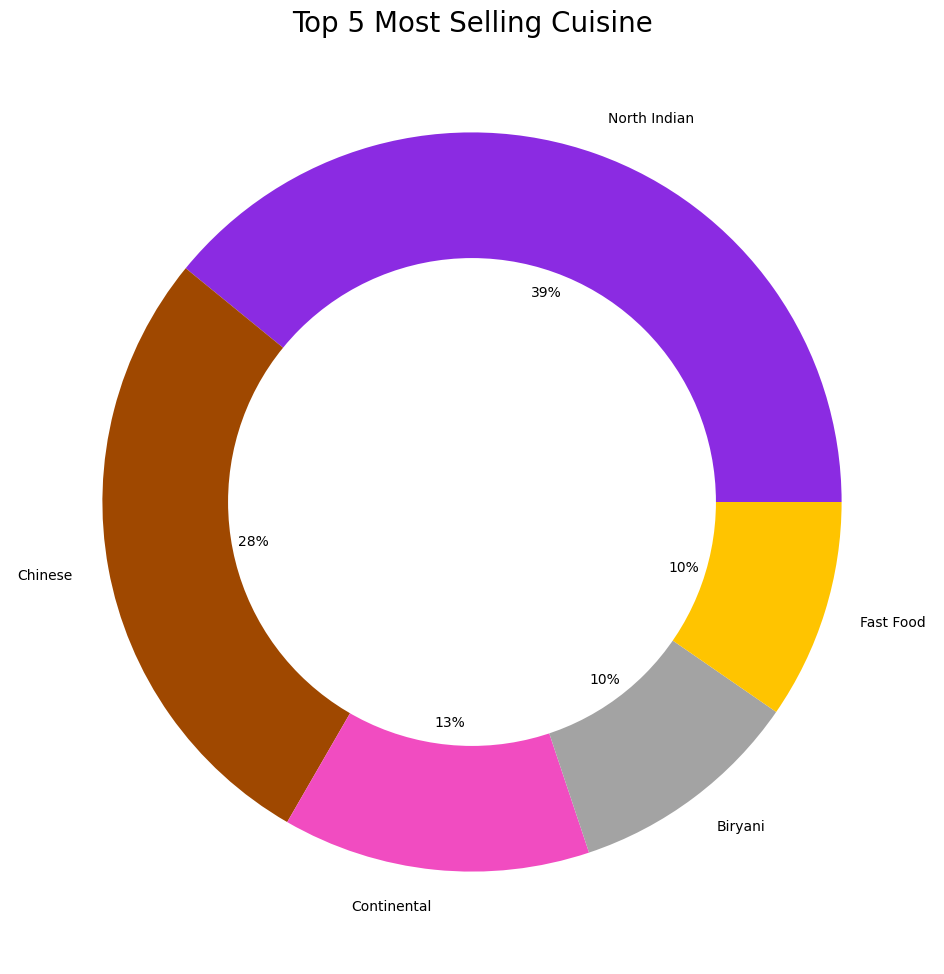

time: 214 ms (started: 2023-07-15 15:32:56 +00:00)


In [ ]:
# Chart - 12 visualization code pie chart for top 5 mpst selling cuisine
data = df_cuisine.sort_values('Number of Restaurant', ascending = False)['Number of Restaurant'].tolist()[:5]
labels = df_cuisine.sort_values('Number of Restaurant', ascending = False)['Cuisine'].tolist()[:5]

#define Seaborn color palette to use
colors = sns.color_palette('bright')[4:9]

#create ring chart
plt.figure(figsize = (15,12))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =20)
centre_circle = plt.Circle((0, 0), 0.66, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

time: 392 µs (started: 2023-07-15 15:32:57 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Multivariate Analysis**

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap for Zamato')

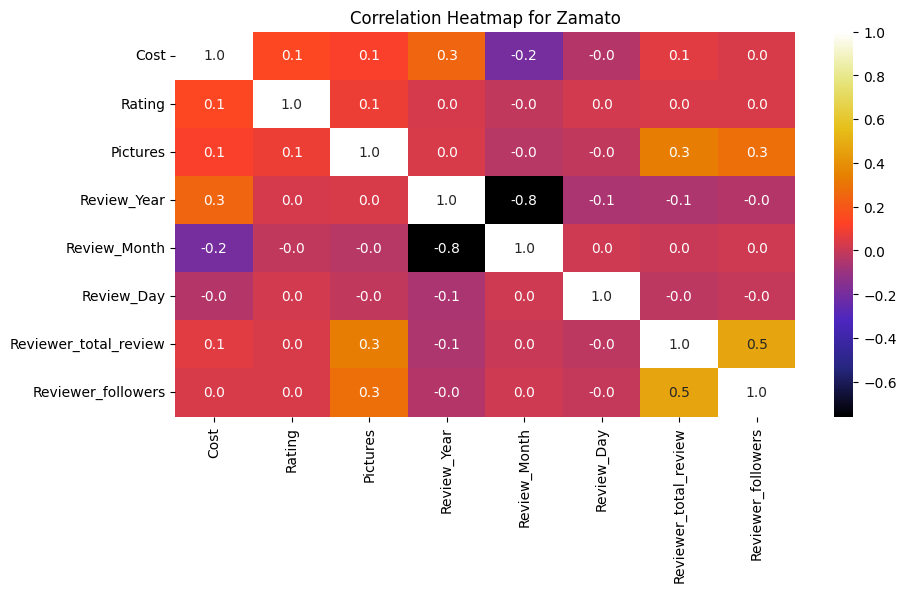

time: 546 ms (started: 2023-07-15 15:32:57 +00:00)


In [ ]:
# Correlation Heatmap visualization code
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_inner.corr(),annot = True,fmt='0.1f',annot_kws={'size':10},vmax =1,cmap= plt.cm.CMRmap)
plt.title('Correlation Heatmap for Zamato')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

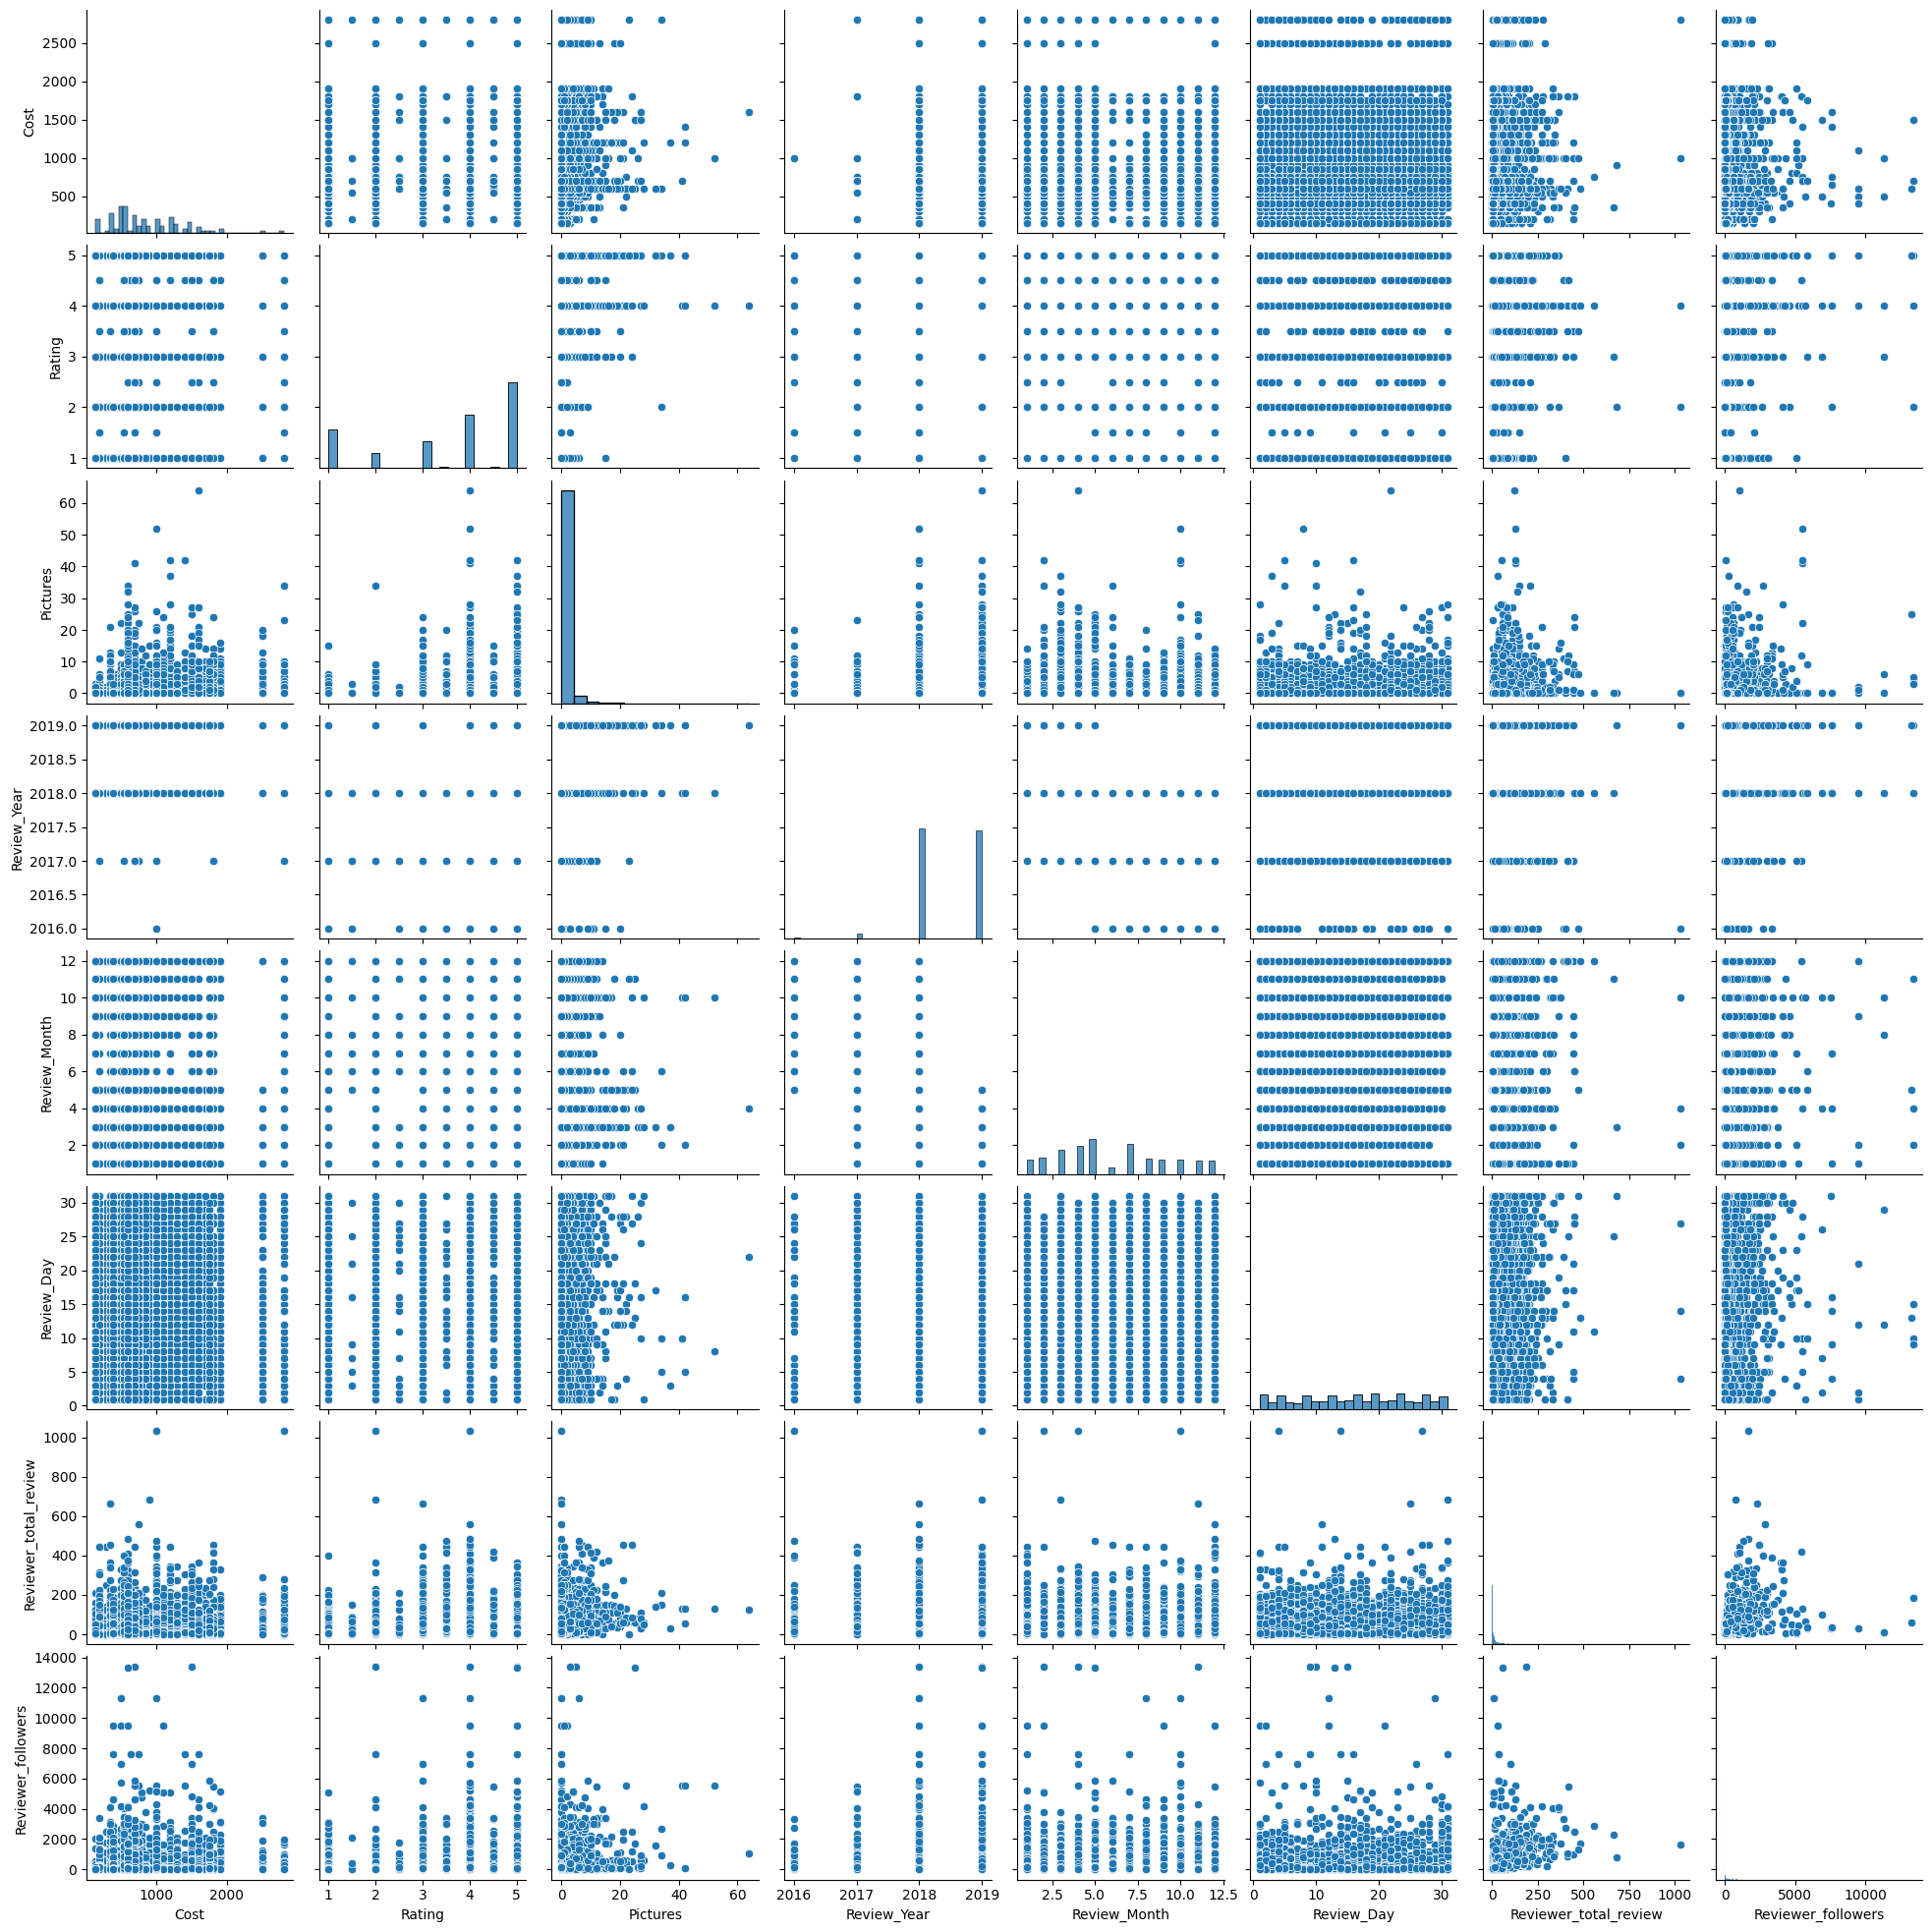

time: 29.7 s (started: 2023-07-15 15:32:57 +00:00)


In [ ]:
# Pair Plot visualization code
sns.pairplot(df_inner)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

We define the three hypothetical statements & performed the needed tests for the same:

Statement-1:

* Null Hypothesis: There is no relationship between Cost and Rating.(H0: 𝛽1 = 0)
* Alternate Hypothesis: There is a relationship between Cost and Rating.(H0: 𝛽1 > 0)
* Test: Simple Linear Regression Analysis


Statement-2:

* Null Hypothesis: There is no relationship between Reviewer_followers and Rating.(H0: 𝛽1 = 0)
* Alternate Hypothesis: There is a relationship between Reviewer_follower and Rating.(H0: 𝛽1 > 0)
* Test: Simple Linear Regression Analysis


Statement-3:

* Null Hypothesis: There is no relationship between Cuisines and Rating.(H0: 𝛽1 = 0)
* Alternate Hypothesis: There is a relationship between Cuisines and Rating.(H0: 𝛽1 > 0)
* Test: Chi-Squared Test.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



* Null Hypothesis: There is no relationship between Cost and Rating.(H0: 𝛽1 = 0)
* Alternate Hypothesis: There is a relationship between Cost and Rating.(H0: 𝛽1 > 0)
* Test: Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df_inner['Cost']
second_sample= df_inner['Rating']
stat, p_value = pearsonr(first_sample,second_sample)
print(f'Correlation between Cost & Rating: {round(stat,2)}')
print(f'P_Value : {round(p_value,2)}')
print('\n')
if p_value > 0.05:
  print('Accept the Null Hypothesis')
else:
  print('Reject the Null Hypothesis')

print('\n')

Correlation between Cost & Rating: 0.14
P_Value : 0.0


Reject the Null Hypothesis


time: 7.52 ms (started: 2023-07-15 15:33:27 +00:00)


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Cost and Rating features we got Correlation coefficient as 0.14 which implies that theses two features are having weak positve correlation between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no relationship between Reviewer_followers and Rating.(H0: 𝛽1 = 0)
* Alternate Hypothesis: There is a relationship between Reviewer_follower and Rating.(H0: 𝛽1 > 0)
* Test: Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df_inner['Reviewer_followers']
second_sample= df_inner['Rating']
stat, p_value = pearsonr(first_sample,second_sample)
print(f'Correlation between Reviewer_followers & Rating: {round(stat,2)}')
print(f'P_Value : {round(p_value,2)}')
print('\n')
if p_value > 0.05:
  print('Accept the Null Hypothesis')
else:
  print('Reject the Null Hypothesis')

print('\n')

Correlation between Reviewer_followers & Rating: 0.04
P_Value : 0.0


Reject the Null Hypothesis


time: 6.25 ms (started: 2023-07-15 15:33:27 +00:00)


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Reviewer_followers and Rating features we got Correlation coefficient as 0.04 which implies that theses two features are having weak positve correlation between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


* Null Hypothesis: There is no relationship between Cuisines and Rating.(H0: 𝛽1 = 0)
* Alternate Hypothesis: There is a relationship between Cuisines and Rating.(H0: 𝛽1 > 0)
* Test: Chi-Squared Test.

#### 2. Perform an appropriate statistical test.

In [ ]:
pd.crosstab(df_inner['Cuisines'], df_inner['Rating'])

Rating                                              1.0  1.5  2.0  2.5  3.0  \
Cuisines                                                                      
American                                              1    0    1    0    2   
American, Chinese, North Indian, Kebab, South I...   18    0    4    0   14   
American, Fast Food, Salad, Burger                   10    0    4    0    6   
American, Wraps, Desserts                            14    0    7    0   19   
Andhra, Biryani, Hyderabadi, North Indian            24    0    8    0    8   
...                                                 ...  ...  ...  ...  ...   
North Indian, South Indian                           23    0    4    0    6   
Seafood, Goan, North Indian, Continental, Asian       5    0    5    0    5   
South Indian, North Indian, Chinese                  44    0   13    0   26   
Street Food, Arabian                                 36    0   12    0    7   
Street Food, North Indian, Fast Food                 24    0    6    0   15   

Rating                                              3.5  4.0  4.5  5.0  
Cuisines                                                                
American                                              0    8    0   88  
American, Chinese, North Indian, Kebab, South I...    0   24    0   40  
American, Fast Food, Salad, Burger                    0   15    0   42  
American, Wraps, Desserts                             0   27    0   33  
Andhra, Biryani, Hyderabadi, North Indian             0   17    0   43  
...                                                 ...  ...  ...  ...  
North Indian, South Indian                            0   10    0   57  
Seafood, Goan, North Indian, Continental, Asian       0   33    0   52  
South Indian, North Indian, Chinese                   0   48    0   69  
Street Food, Arabian                                  0    7    0   38  
Street Food, North Indian, Fast Food                  0   31    0   24  

[89 rows x 9 columns]

time: 50.6 ms (started: 2023-07-15 15:33:27 +00:00)


In [ ]:
# Perform Statistical Test to obtain P-Value
# Import liberary
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(df_inner['Cuisines'], df_inner['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)
print(f'Chi-Squqred value between Cost & Rating: {round(chi2,2)}')
print(f'P_Value : {round(p_value,2)}')
print(f'Degree of freedom : {dof}')
print(f'Expected value : {expected[0]}')
print('\n')
if p_value > 0.05:
  print('Accept the Null Hypothesis')
else:
  print('Reject the Null Hypothesis')

print('\n')

Chi-Squqred value between Cost & Rating: 3984.03
P_Value : 0.0
Degree of freedom : 704
Expected value : [17.41792993  0.09035237  6.86678044  0.1907439  11.97670917  0.47184018
 23.82290935  0.69270154 38.47003313]


Reject the Null Hypothesis


time: 40.3 ms (started: 2023-07-15 15:33:27 +00:00)


##### Which statistical test have you done to obtain P-Value?

For the third hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?

 I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

missing_value  % of missing values Data_Type
Restaurant                         0                  0.0    object
Links                              0                  0.0    object
Cost                               0                  0.0     int64
Cuisines                           0                  0.0    object
Timings                            0                  0.0    object
Reviewer                           0                  0.0    object
Review                             0                  0.0    object
Rating                             0                  0.0   float64
Metadata                           0                  0.0    object
Time                               0                  0.0    object
Pictures                           0                  0.0     int64
Review_Year                        0                  0.0   float64
Review_Month                       0                  0.0   float64
Review_Day                         0                  0.0   float64
Reviewer_total_review              0                  0.0   float64
Reviewer_followers                 0                  0.0   float64

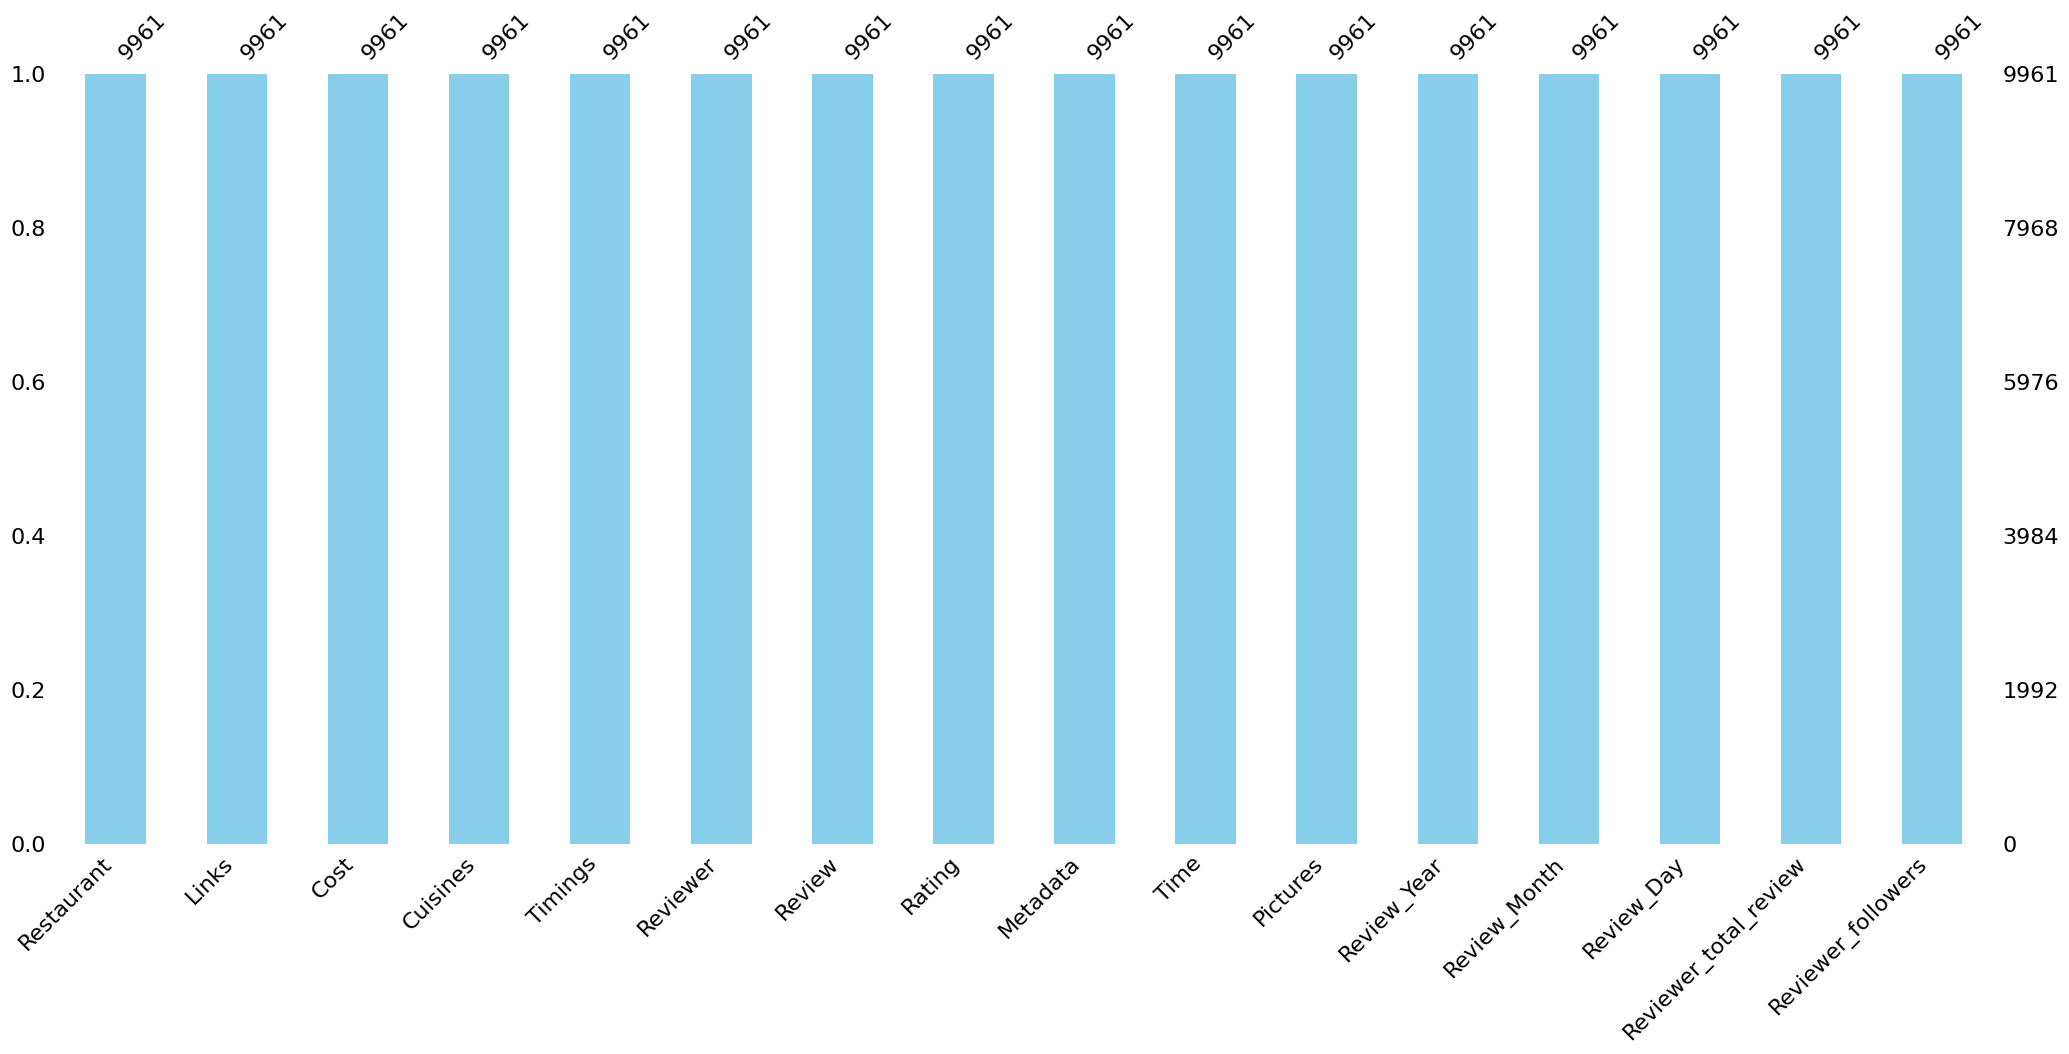

time: 1.56 s (started: 2023-07-15 15:33:27 +00:00)


In [ ]:
# Handling Missing Values & Missing Value Imputation
missing_func(df_inner)

#### What all missing value imputation techniques have you used and why did you use those techniques?

As we have already treated null values so we do not have any more missing/null/duplicate values in our dataset and our dataset is good to go. In this dataset there is no null value preset in the dataset so there is no any method used to fill the NULL value.

### 2. Handling Outliers

#### **Anmoly Detection**

In [ ]:
#Anamoly detection
# Import Isolation Forest liberary
from sklearn.ensemble import IsolationForest
#checking for normal distribution
def normal_distribution(df):
  numerical_features = [i for i in df.columns if df[i].dtypes != 'object']
  for i in numerical_features:
    print(f'Skewness of {i} : {round(df[i].skew(),2)}')
    print(f'Kurtosis of {i} : {round(df[i].kurt(),2)}')
    print('\n')


time: 569 ms (started: 2023-07-15 15:33:29 +00:00)


In [ ]:
# Check the normal distribution of dataset
normal_distribution(df_inner)

Skewness of Cost : 1.15
Kurtosis of Cost : 1.57


Skewness of Rating : -0.71
Kurtosis of Rating : -0.95


Skewness of Pictures : 7.98
Kurtosis of Pictures : 105.55


Skewness of Review_Year : -0.54
Kurtosis of Review_Year : 0.15


Skewness of Review_Month : 0.29
Kurtosis of Review_Month : -0.94


Skewness of Review_Day : -0.06
Kurtosis of Review_Day : -1.16


Skewness of Reviewer_total_review : 5.84
Kurtosis of Reviewer_total_review : 67.22


Skewness of Reviewer_followers : 10.09
Kurtosis of Reviewer_followers : 151.31


time: 26.9 ms (started: 2023-07-15 15:33:29 +00:00)


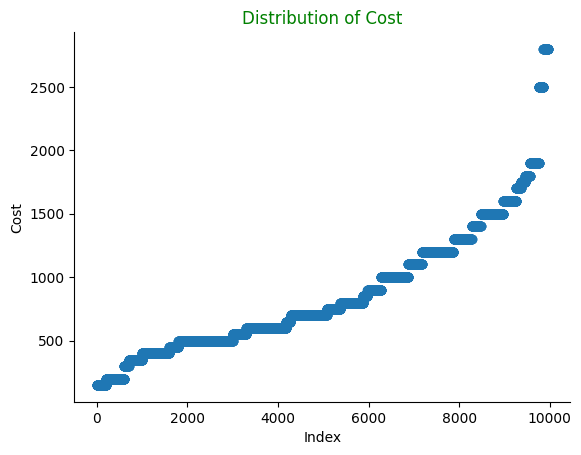

time: 426 ms (started: 2023-07-15 15:33:29 +00:00)


In [ ]:
# Ploting of the Cost
plt.scatter(range(df_inner.shape[0]), np.sort(df_inner['Cost'].values))
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Distribution of Cost',color = 'green')
sns.despine()

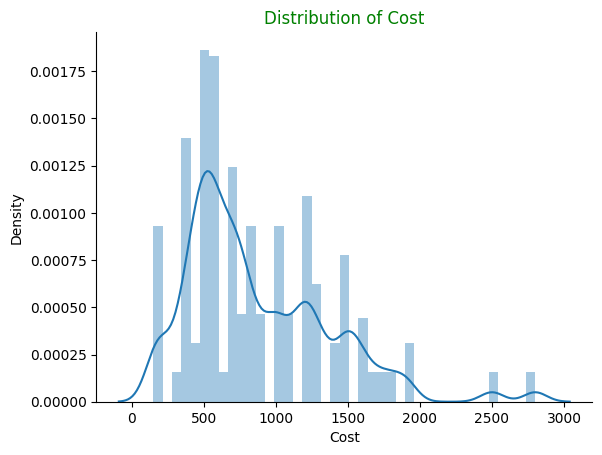

time: 616 ms (started: 2023-07-15 15:33:30 +00:00)


In [ ]:
# Distribution plot of Cost
sns.distplot(df_inner['Cost'])
plt.title('Distribution of Cost',color = 'green')
sns.despine()

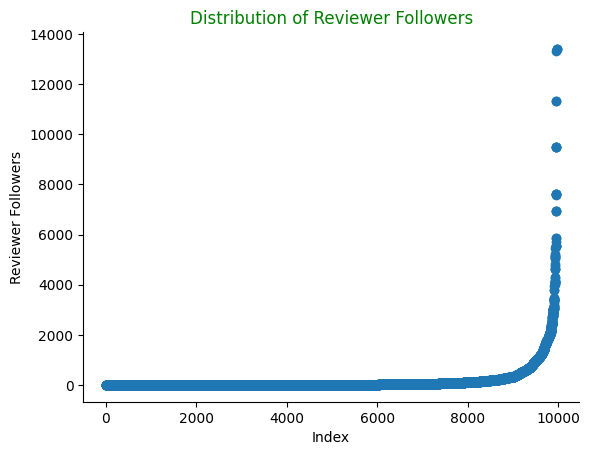

time: 485 ms (started: 2023-07-15 15:33:30 +00:00)


In [ ]:
# Ploting of the Reviewer_followers
plt.scatter(range(df_inner.shape[0]), np.sort(df_inner['Reviewer_followers'].values))
plt.xlabel('Index')
plt.ylabel('Reviewer Followers')
plt.title('Distribution of Reviewer Followers',color = 'green')
sns.despine()

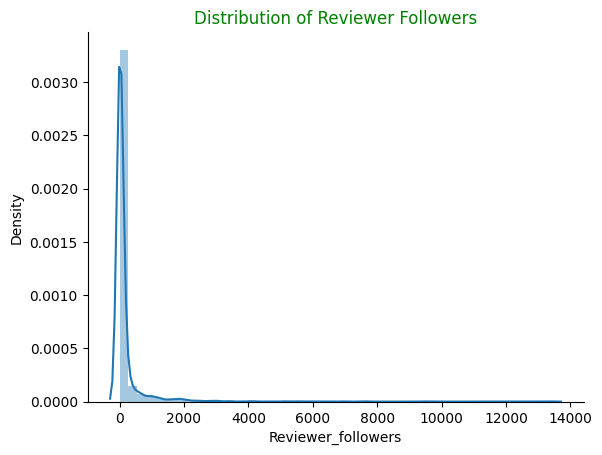

time: 658 ms (started: 2023-07-15 15:33:31 +00:00)


In [ ]:
# Distribution plot of Reviewer Followers
sns.distplot(df_inner['Reviewer_followers'])
plt.title('Distribution of Reviewer Followers',color = 'green')
sns.despine()

In [ ]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(df_inner['Cost'].values.reshape(-1, 1))
df_inner['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(df_inner['Cost'].values.reshape(-1, 1))
df_inner['outlier_univariate_Cost'] = isolation_forest.predict(df_inner['Cost'].values.reshape(-1, 1))

time: 1.13 s (started: 2023-07-15 15:33:32 +00:00)


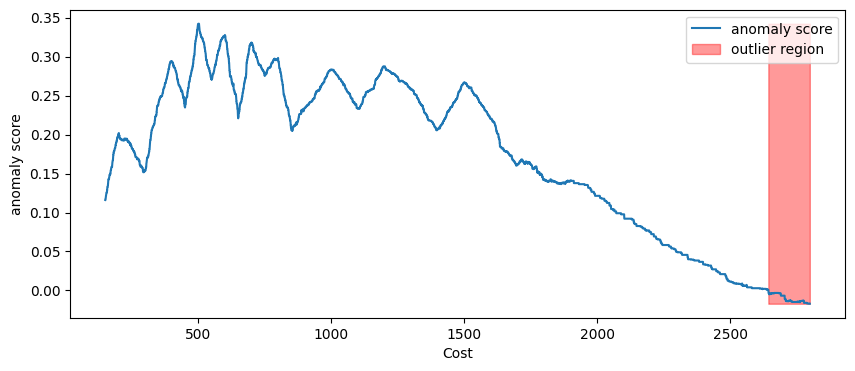

time: 678 ms (started: 2023-07-15 15:33:33 +00:00)


In [ ]:
#chart to visualize outliers
xx = np.linspace(df_inner['Cost'].min(), df_inner['Cost'].max(), len(df_inner)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [ ]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(df_inner['Cost'].values.reshape(-1, 1))
df_inner['anomaly_score_univariate_followers'] = isolation_forest.decision_function(df_inner['Reviewer_followers'].values.reshape(-1, 1))
df_inner['outlier_univariate_followers'] = isolation_forest.predict(df_inner['Reviewer_followers'].values.reshape(-1, 1))

time: 748 ms (started: 2023-07-15 15:33:33 +00:00)


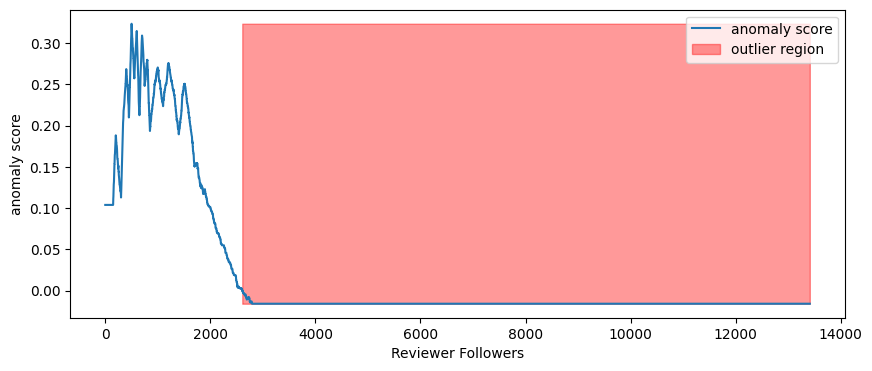

time: 573 ms (started: 2023-07-15 15:33:34 +00:00)


In [ ]:
#chart to visualize outliers
xx = np.linspace(df_inner['Reviewer_followers'].min(), df_inner['Reviewer_followers'].max(), len(df_inner)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer Followers')
plt.show();

#### **Outliers Treatment**

In [ ]:
# Check the information of merged dataset
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 0 to 9960
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Restaurant                          9961 non-null   object 
 1   Links                               9961 non-null   object 
 2   Cost                                9961 non-null   int64  
 3   Cuisines                            9961 non-null   object 
 4   Timings                             9961 non-null   object 
 5   Reviewer                            9961 non-null   object 
 6   Review                              9961 non-null   object 
 7   Rating                              9961 non-null   float64
 8   Metadata                            9961 non-null   object 
 9   Time                                9961 non-null   object 
 10  Pictures                            9961 non-null   int64  
 11  Review_Year                         9961 no

On the basis of the dataset info we can split the data into two parts:
* Object_features : Columns having containg the object datatype.
* Numerical_features : Columns having containing the int and float datatype.

In [ ]:
# List of columns having contain the object data type
object_features

['Restaurant',
 'Links',
 'Cuisines',
 'Timings',
 'Reviewer',
 'Review',
 'Metadata',
 'Time']

time: 4.39 ms (started: 2023-07-15 15:33:35 +00:00)


In [ ]:
# List of columns having numerical data type
numerical_features

['Cost',
 'Rating',
 'Pictures',
 'Review_Year',
 'Review_Month',
 'Review_Day',
 'Reviewer_total_review',
 'Reviewer_followers']

time: 4.48 ms (started: 2023-07-15 15:33:35 +00:00)


* In object features, there are no outliers are present in any features.
* Hence we have to treated outliers only continuous features.

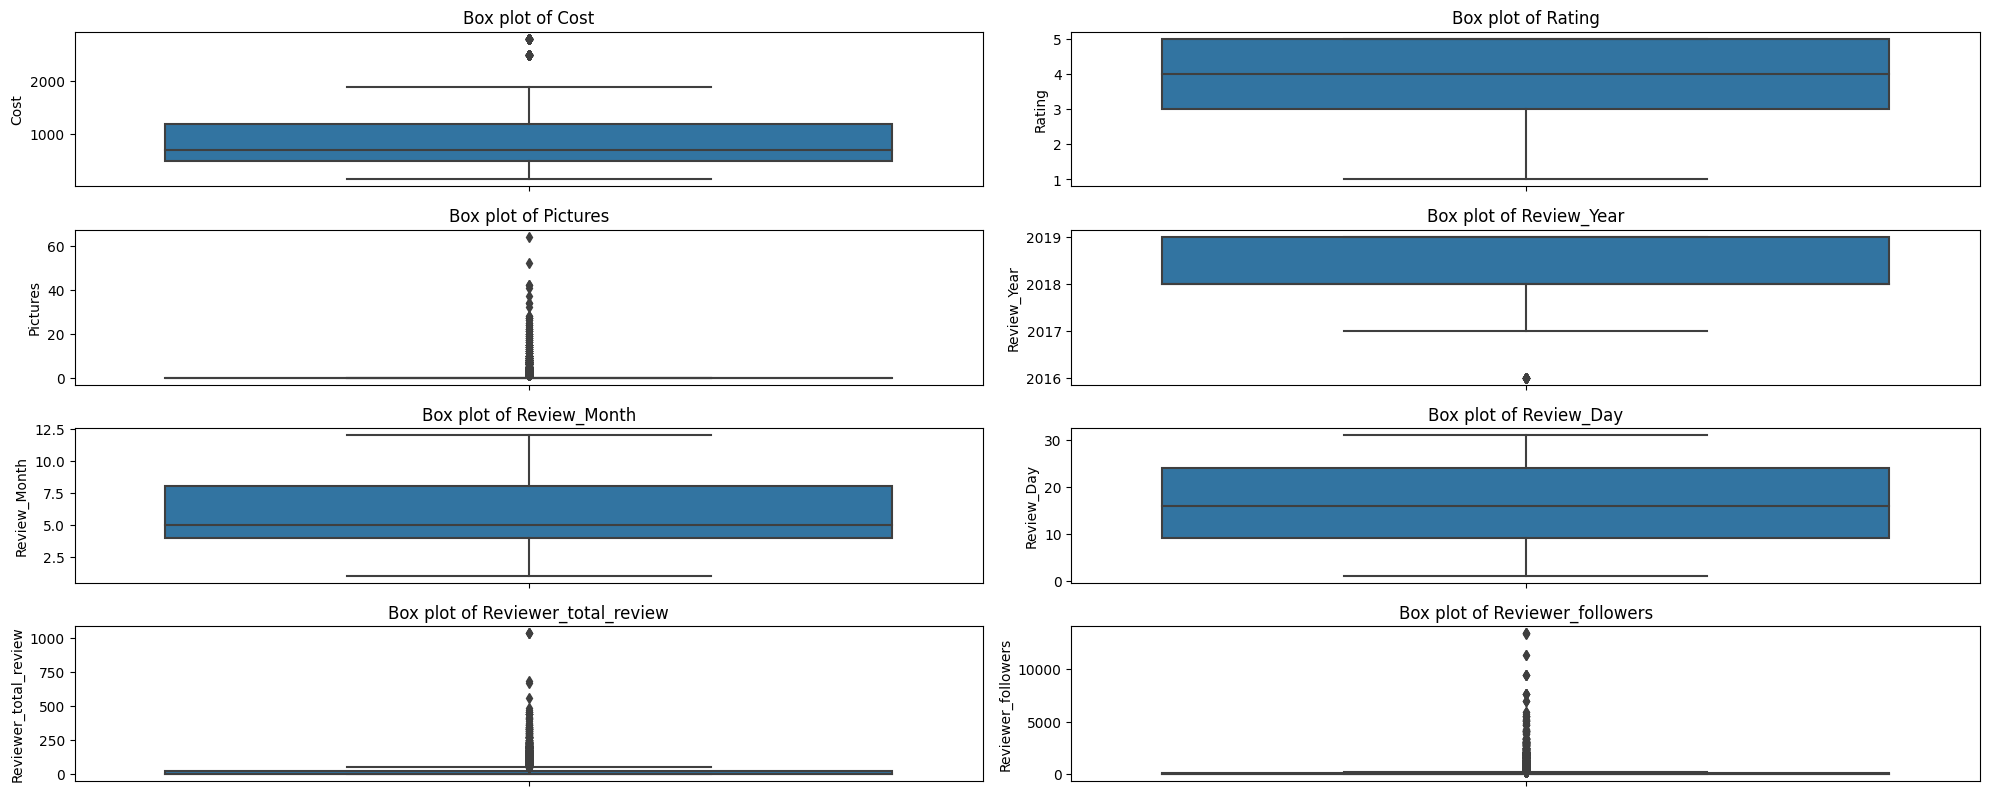

time: 1.93 s (started: 2023-07-15 15:33:35 +00:00)


In [ ]:
# To cheack the outliers using boxplot
plt.figure(figsize= (20,10))
for n, c in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/2 + 1),2,n+1)
  sns.boxplot(y= c ,data= df_inner)
  plt.title(f'Box plot of {c}')
  plt.tight_layout()

In [ ]:
# Detect the outliers present in the dataset
for i in numerical_features:
  print(i)
  outliers_detection(df_inner[i])
  print('\n')

Cost
Q1 : 500.0 
 Q3 : 1200.0
Inter Quartile Range : 700.0
Lower Bound : -550.0 
 Upper Bound : 2250.0
Length of the otliers : 200
Percentage of outliers : 2.01%


Rating
Q1 : 3.0 
 Q3 : 5.0
Inter Quartile Range : 2.0
Lower Bound : 0.0 
 Upper Bound : 8.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Pictures
Q1 : 0.0 
 Q3 : 0.0
Inter Quartile Range : 0.0
Lower Bound : 0.0 
 Upper Bound : 0.0
Length of the otliers : 1983
Percentage of outliers : 19.91%


Review_Year
Q1 : 2018.0 
 Q3 : 2019.0
Inter Quartile Range : 1.0
Lower Bound : 2016.5 
 Upper Bound : 2020.5
Length of the otliers : 43
Percentage of outliers : 0.43%


Review_Month
Q1 : 4.0 
 Q3 : 8.0
Inter Quartile Range : 4.0
Lower Bound : -2.0 
 Upper Bound : 14.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Review_Day
Q1 : 9.0 
 Q3 : 24.0
Inter Quartile Range : 15.0
Lower Bound : -13.5 
 Upper Bound : 46.5
Length of the otliers : 0
Percentage of outliers : 0.0%


Reviewer_total_review
Q1 : 1.0 
 Q3 : 22.0


In [ ]:
# Outlier treatments
def outliers_treatment(df):
  # Calculation of first and third percentile
  q1 = np.percentile(df,25)
  q3 = np.percentile(df,75)
  # Defining the inter quartile range(IQR)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  # Treated the outliers
  treated_data = []
  for i in df:
    if i < lower_bound:
      treated_data.append(q1)
    elif i > upper_bound:
      treated_data.append(q3)
    else:
      treated_data.append(i)
  return treated_data

time: 590 µs (started: 2023-07-15 15:33:37 +00:00)


In [ ]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in numerical_features:
  df_inner[feature] = outliers_treatment(df_inner[feature])

time: 66.2 ms (started: 2023-07-15 15:33:37 +00:00)


In [ ]:
# Detect the outliers present in the dataset
for i in numerical_features:
  print(i)
  outliers_detection(df_inner[i])
  print('\n')

Cost
Q1 : 500.0 
 Q3 : 1200.0
Inter Quartile Range : 700.0
Lower Bound : -550.0 
 Upper Bound : 2250.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Rating
Q1 : 3.0 
 Q3 : 5.0
Inter Quartile Range : 2.0
Lower Bound : 0.0 
 Upper Bound : 8.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Pictures
Q1 : 0.0 
 Q3 : 0.0
Inter Quartile Range : 0.0
Lower Bound : 0.0 
 Upper Bound : 0.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Review_Year
Q1 : 2018.0 
 Q3 : 2019.0
Inter Quartile Range : 1.0
Lower Bound : 2016.5 
 Upper Bound : 2020.5
Length of the otliers : 0
Percentage of outliers : 0.0%


Review_Month
Q1 : 4.0 
 Q3 : 8.0
Inter Quartile Range : 4.0
Lower Bound : -2.0 
 Upper Bound : 14.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Review_Day
Q1 : 9.0 
 Q3 : 24.0
Inter Quartile Range : 15.0
Lower Bound : -13.5 
 Upper Bound : 46.5
Length of the otliers : 0
Percentage of outliers : 0.0%


Reviewer_total_review
Q1 : 1.0 
 Q3 : 22.0
Inter Quar

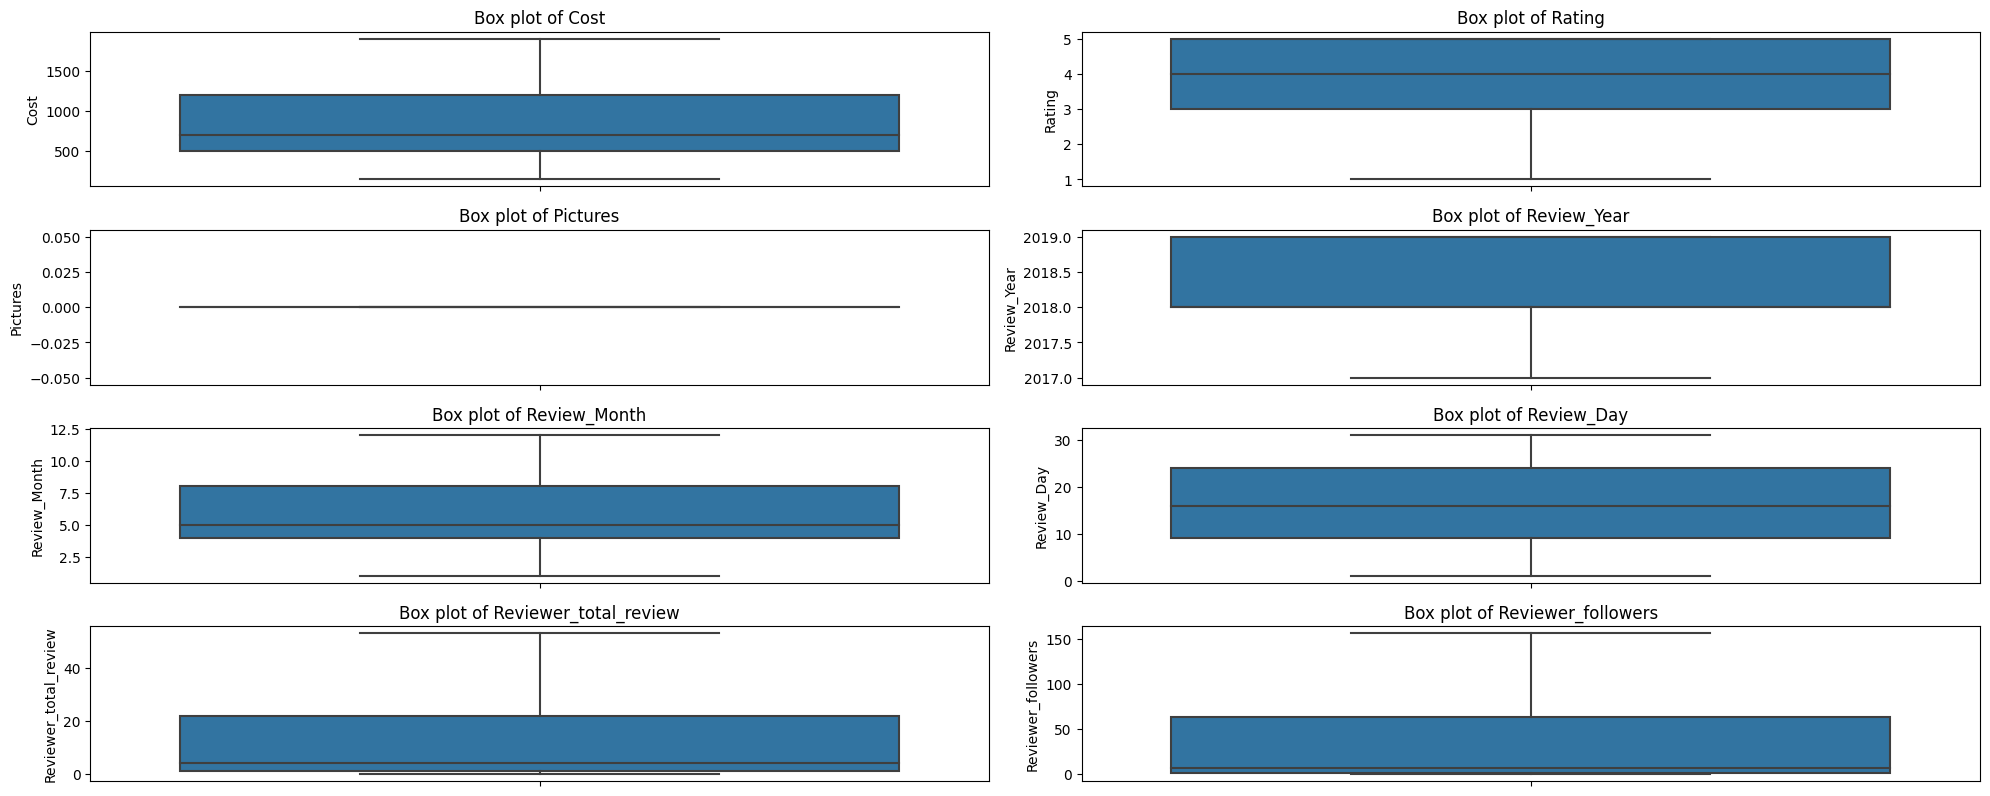

time: 1.97 s (started: 2023-07-15 15:33:37 +00:00)


In [ ]:
# To cheack the outliers using boxplot
plt.figure(figsize= (20,10))
for n, c in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/2 + 1),2,n+1)
  sns.boxplot(y= c ,data= df_inner)
  plt.title(f'Box plot of {c}')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Dataset Information
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 0 to 9960
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Restaurant                          9961 non-null   object 
 1   Links                               9961 non-null   object 
 2   Cost                                9961 non-null   float64
 3   Cuisines                            9961 non-null   object 
 4   Timings                             9961 non-null   object 
 5   Reviewer                            9961 non-null   object 
 6   Review                              9961 non-null   object 
 7   Rating                              9961 non-null   float64
 8   Metadata                            9961 non-null   object 
 9   Time                                9961 non-null   object 
 10  Pictures                            9961 non-null   float64
 11  Review_Year                         9961 no

In [147]:
# Encode your categorical columns
#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = df_restaurant[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])
#checking if the values are correct
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]
#replacing cuisines_ from columns name - for better understanding run seperatly
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()
cluster_dummy

Restaurant  American  Andhra  Arabian  Asian  \
0                        10 Downing Street         0       0        0      0   
1                                 13 Dhaba         0       0        0      0   
2           3B's - Buddies, Bar & Barbecue         0       0        0      0   
3                AB's - Absolute Barbecues         0       0        0      0   
4                        Absolute Sizzlers         1       0        0      0   
..                                     ...       ...     ...      ...    ...   
100                            Wich Please         0       0        0      0   
101  Yum Yum Tree - The Arabian Food Court         0       0        0      0   
102        Zega - Sheraton Hyderabad Hotel         0       0        0      1   
103               Zing's Northeast Kitchen         0       0        0      0   
104                                eat.fit         0       0        0      0   

     BBQ  Bakery  Beverages  Biryani  Burger  ...  North Indian  Pizza  Salad  \
0      0       0          0        0       0  ...             1      0      0   
1      0       0          0        0       0  ...             1      0      0   
2      0       0          0        0       0  ...             1      0      0   
3      0       0          0        0       0  ...             1      0      0   
4      0       0          0        0       0  ...             0      0      0   
..   ...     ...        ...      ...     ...  ...           ...    ...    ...   
100    0       0          0        0       0  ...             0      0      0   
101    0       0          0        0       0  ...             1      0      0   
102    0       0          0        0       0  ...             0      0      0   
103    0       0          0        0       0  ...             0      0      0   
104    0       0          0        0       0  ...             1      0      0   

     Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0          0             0        0            0      0     0      0  
1          0             0        0            0      0     0      0  
2          0             0        0            0      0     0      0  
3          0             0        0            0      0     0      0  
4          0             0        0            0      0     0      0  
..       ...           ...      ...          ...    ...   ...    ...  
100        0             0        0            0      0     0      0  
101        0             0        0            0      0     0      0  
102        0             0        0            0      1     0      0  
103        0             0        0            0      0     0      0  
104        0             1        0            0      0     0      0  

[105 rows x 45 columns]

time: 50.9 ms (started: 2023-07-15 16:00:33 +00:00)


In [148]:
#total cuisine count
df_restaurant['Total_Cuisine_Count'] = df_restaurant['Cuisines'].apply(lambda x : len(x.split(',')))

time: 2.27 ms (started: 2023-07-15 16:01:48 +00:00)


In [162]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_restaurant_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
df_restaurant = df_restaurant.merge(avg_restaurant_rating, on = 'Restaurant')
df_restaurant.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  Total_Cuisine_Count  \
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                    6   
1                                     11 AM to 11 PM                    3   
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM                    4   
3                                    12 Noon to 2 AM                    5   
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...                    5   

   Average_Rating  Total_review  
0            4.28           100  
1            4.70           100  
2            4.66           100  
3            3.21           100  
4            4.34           100

time: 51.6 ms (started: 2023-07-15 16:22:00 +00:00)


In [163]:
#adding cost column to the new dataset
cluster_dummy = df_restaurant[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

time: 7.5 ms (started: 2023-07-15 16:23:28 +00:00)


In [165]:
# First look of the cluster_dummy dataset
cluster_dummy.head()

Restaurant  Cost  Average_Rating  \
0                   Beyond Flavours   800           4.280   
1                          Paradise   800           4.700   
2                          Flechazo  1300           4.660   
3    Shah Ghouse Hotel & Restaurant   800           3.210   
4        Over The Moon Brew Company  1200           4.340   
..                              ...   ...             ...   
95                       Desi Bytes   400           2.900   
96                Hyderabadi Daawat   600           3.830   
97  Zega - Sheraton Hyderabad Hotel  1750           4.450   
98                         Triptify   400           3.550   
99                 Chinese Pavilion  1000           3.745   

    Total_Cuisine_Count  American  Andhra  Arabian  Asian  BBQ  Bakery  ...  \
0                     6         0       0        0      0    0       0  ...   
1                     3         0       0        0      0    0       0  ...   
2                     4         0       0        0      1    0       0  ...   
3                     5         0       0        0      0    0       0  ...   
4                     5         0       0        0      1    0       0  ...   
..                  ...       ...     ...      ...    ...  ...     ...  ...   
95                    2         0       0        0      0    0       0  ...   
96                    3         0       0        0      0    0       0  ...   
97                    2         0       0        0      1    0       0  ...   
98                    1         0       0        0      0    0       0  ...   
99                    2         0       0        0      0    0       0  ...   

    North Indian  Pizza  Salad  Seafood  South Indian  Spanish  Street Food  \
0              1      0      0        0             1        0            0   
1              1      0      0        0             0        0            0   
2              1      0      0        0             0        0            0   
3              1      0      0        1             0        0            0   
4              1      0      0        0             0        0            0   
..           ...    ...    ...      ...           ...      ...          ...   
95             1      0      0        0             0        0            0   
96             0      0      0        0             0        0            0   
97             0      0      0        0             0        0            0   
98             1      0      0        0             0        0            0   
99             0      0      0        1             0        0            0   

    Sushi  Thai  Wraps  
0       0     0      0  
1       0     0      0  
2       0     0      0  
3       0     0      0  
4       0     0      0  
..    ...   ...    ...  
95      0     0      0  
96      0     0      0  
97      1     0      0  
98      0     0      0  
99      0     0      0  

[100 rows x 48 columns]

time: 33.8 ms (started: 2023-07-15 16:23:44 +00:00)


In [ ]:
# Encode your categorical columns

In [167]:
#creating data frame for categorial encoding
cluster_df = df_restaurant[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

time: 2.97 ms (started: 2023-07-15 16:26:31 +00:00)


In [168]:
#creating new dataframe for clustering
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

time: 8.34 ms (started: 2023-07-15 16:26:56 +00:00)


In [169]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

time: 694 ms (started: 2023-07-15 16:27:13 +00:00)


In [171]:
#result from encoding
cluster_df

Restaurant  \
0                   Beyond Flavours   
1                          Paradise   
2                          Flechazo   
3    Shah Ghouse Hotel & Restaurant   
4        Over The Moon Brew Company   
..                              ...   
95                       Desi Bytes   
96                Hyderabadi Daawat   
97  Zega - Sheraton Hyderabad Hotel   
98                         Triptify   
99                 Chinese Pavilion   

                                             Cuisines    Cost  Average_Rating  \
0   Chinese, Continental, Kebab, European, South I...   800.0           4.280   
1                      Biryani, North Indian, Chinese   800.0           4.700   
2        Asian, Mediterranean, North Indian, Desserts  1300.0           4.660   
3   Biryani, North Indian, Chinese, Seafood, Bever...   800.0           3.210   
4   Asian, Continental, North Indian, Chinese, Med...  1200.0           4.340   
..                                                ...     ...             ...   
95                              North Indian, Chinese   400.0           2.900   
96                       Hyderabadi, Chinese, Mughlai   600.0           3.830   
97                                       Asian, Sushi  1750.0           4.450   
98                                       North Indian   400.0           3.550   
99                                   Chinese, Seafood  1000.0           3.745   

    Total_Cuisine_Count Chinese Continental Kebab European South Indian  ...  \
0                   6.0       1           1     1        1            1  ...   
1                   3.0       1           0     0        0            0  ...   
2                   4.0       0           0     0        0            0  ...   
3                   5.0       1           0     0        0            0  ...   
4                   5.0       1           1     0        0            0  ...   
..                  ...     ...         ...   ...      ...          ...  ...   
95                  2.0       1           0     0        0            0  ...   
96                  3.0       1           0     0        0            0  ...   
97                  2.0       0           0     0        0            0  ...   
98                  1.0       0           0     0        0            0  ...   
99                  2.0       1           0     0        0            0  ...   

   Spanish Wraps Thai Indonesian Modern Indian Momos Pizza North Eastern  \
0        0     0    0          0             0     0     0             0   
1        0     0    0          0             0     0     0             0   
2        0     0    0          0             0     0     0             0   
3        0     0    0          0             0     0     0             0   
4        0     0    0          0             0     0     0             0   
..     ...   ...  ...        ...           ...   ...   ...           ...   
95       0     0    0          0             0     0     0             0   
96       0     0    0          0             0     0     0             0   
97       0     0    0          0             0     0     0             0   
98       0     0    0          0             0     0     0             0   
99       0     0    0          0             0     0     0             0   

   Mithai Malaysian  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0  
..    ...       ...  
95      0         0  
96      0         0  
97      0         0  
98      0         0  
99      0         0  

[100 rows x 49 columns]

time: 50.5 ms (started: 2023-07-15 16:28:09 +00:00)


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***